In [1]:
import netCDF4     
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
plt.rcParams['figure.figsize'] = 15,8
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import from_levels_and_colors
from matplotlib import colors
import matplotlib
import os

#read grid paramenters
grid_Small=netCDF4.Dataset('/data/em/data/GRIDCRO2D_01012015.nc')

#lon and lat to np array
lon=np.array(grid_Small.variables['LON'][0,0,:,:])
lat=np.array(grid_Small.variables['LAT'][0,0,:,:])

In [2]:
ni=103
nj=184
nlays=7 

cmaq_sp=['PAR','PNO3','IOLE','BAP','PSO4','PEC','CO','POC','SO2','OLE','ISOP','TERP','NO2','ALDX','CH4','XYL','NH3','ETOH','ETHA','FORM','TOL','PMC','ETH','PMFINE','ALD2','BENZENE','NO','NR','MEOH']
dim=25 
dic_species={}         
for spec in cmaq_sp:
     dic_species[spec]=np.zeros([ni,nj])

#dic_NO={}
input_dir='/data/em/data/outputs-speciation-d02-LifeIP-CMAQ_old/'
for file in os.listdir(input_dir):
    f_split=file.split( "-" )
    
    if f_split[1][:-4] in dic_species.keys():
    
        au=np.load('{0}/{1}'.format(input_dir,file))
        
        dic_species[f_split[1][:-4]]+=np.sum(au,axis=0)*1000 
        
        #if f_split[1][:-4] == 'NO':
        #   dic_NO['{0}-{1}'.format(f_split[0],f_split[1][:-4])]=np.sum(au,axis=0) 
                          

In [3]:
# read annual emission file
emissions=netCDF4.Dataset('/data/em/data/EMISIONS_FUME_2015.nc')
# biogenic
biog=netCDF4.Dataset('/data/em/data/ds_megan-2015.nc')

# save 2-d fields of annual emissions in the numpy array and dictionary dic_ann 
dic_ann={}
dic_ann_H={}
for i in emissions.variables.keys():
    if i !='TFLAG': 
       dic_ann[i]=np.array(emissions.variables[i][0,0,:,:]) 
       if i in biog.variables.keys():
           
           dic_ann_H[i]=np.array(emissions.variables[i][0,0,:,:])-np.array(biog.variables[i][0,0,:,:])
           #print(i, np.sum(dic_ann_H[i]), np.sum(dic_ann[i]), np.sum(np.array(emissions.variables[i][0,0,:,:])))  
       else:
           dic_ann_H[i]=dic_ann[i]      

In [4]:
for i in dic_ann.keys():
        print(i,'###################################')
        print('FUME {0:.1f} '.format(np.sum(dic_ann[i])))
        print('FUME_HUMAN {0:.1f}'.format(np.sum(dic_ann_H[i])))
        print('EM {0:.1f}'.format(np.sum(dic_species[i])))
        #print('Rozdiel EM -FUME {0:.1f} v percentach {1:.1f}'.format(np.sum(dic_species[i]-dic_ann[i]), 100*np.sum(dic_species[i]-dic_ann[i])/np.sum(dic_species[i])))
        print('Rozdiel EM -FUME_HUMAN {0:.1f} v percentach {1:.1f}'.format(np.sum(dic_species[i]-dic_ann_H[i]), 100*np.sum(dic_species[i]-dic_ann_H[i])/np.sum(dic_species[i])))
        

NH3 ###################################
FUME 23125518.0 
FUME_HUMAN 23125518.0
EM 21787199.3
Rozdiel EM -FUME_HUMAN -1338318.3 v percentach -6.1
ALDX ###################################
FUME 121935.8 
FUME_HUMAN 50157.1
EM 49894.3
Rozdiel EM -FUME_HUMAN -262.8 v percentach -0.5
ISOP ###################################
FUME 40201.6 
FUME_HUMAN 0.0
EM 0.0
Rozdiel EM -FUME_HUMAN 0.0 v percentach nan
NO2 ###################################
FUME 1350088.5 
FUME_HUMAN 1350088.5
EM 1333125.3
Rozdiel EM -FUME_HUMAN -16963.1 v percentach -1.3
POC ###################################
FUME 105907200.0 
FUME_HUMAN 105907200.0
EM 105731331.4
Rozdiel EM -FUME_HUMAN -175865.5 v percentach -0.2
BAP ###################################
FUME 111559.6 
FUME_HUMAN 111559.6
EM 111096.4
Rozdiel EM -FUME_HUMAN -463.2 v percentach -0.4
XYL ###################################
FUME 630546.5 
FUME_HUMAN 610340.5
EM 606162.0
Rozdiel EM -FUME_HUMAN -4178.5 v percentach -0.7
FORM ###################################
F

/home/KOL/p6065/anaconda3/envs/geo/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [5]:
mapp=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=49.375,lon_0=17.0,width=833780,height=466351,resolution='i')

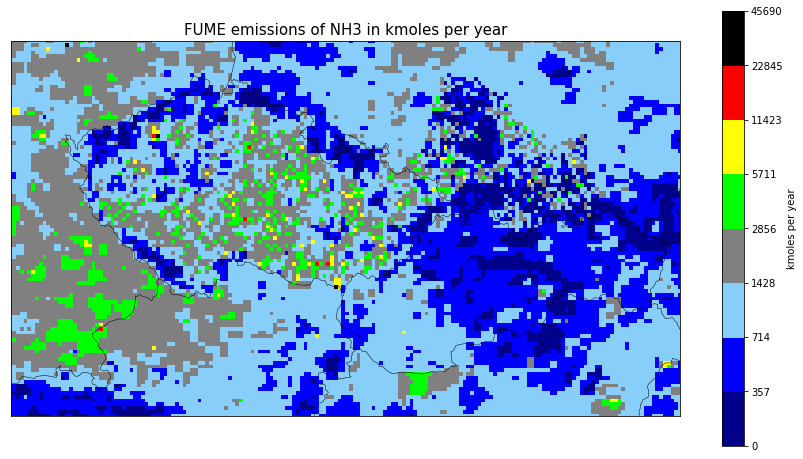

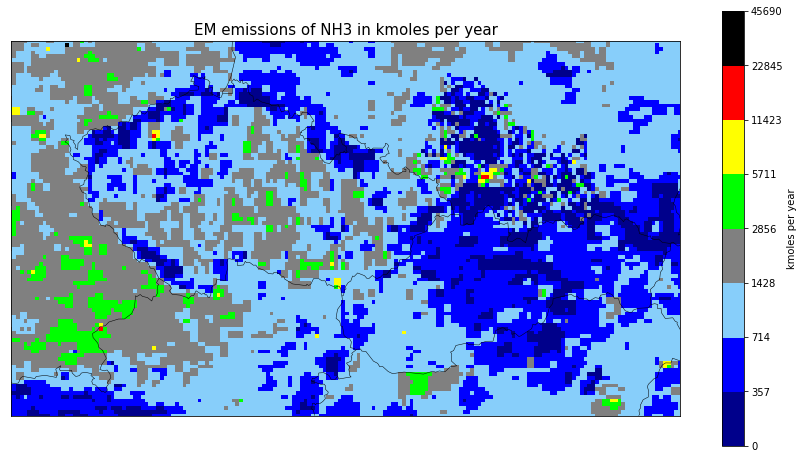

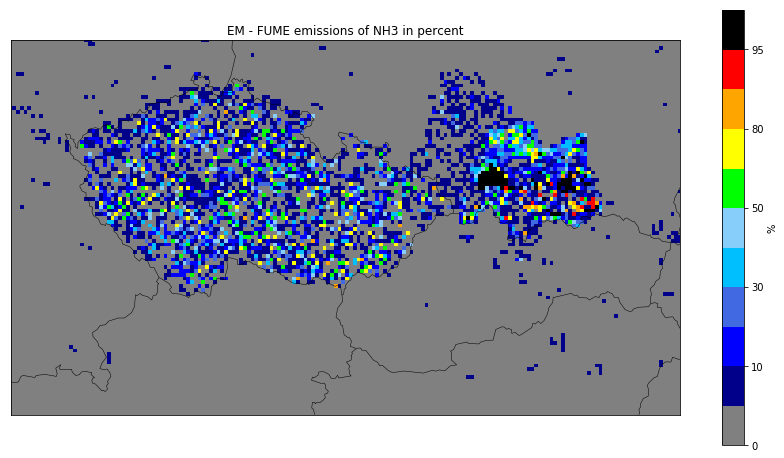

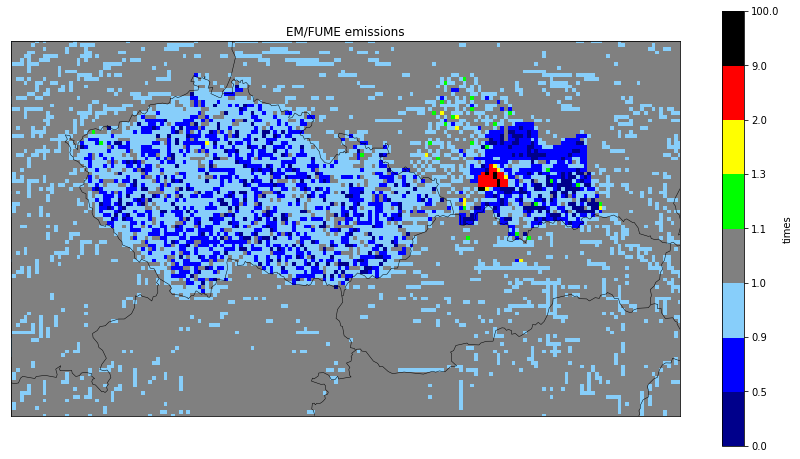

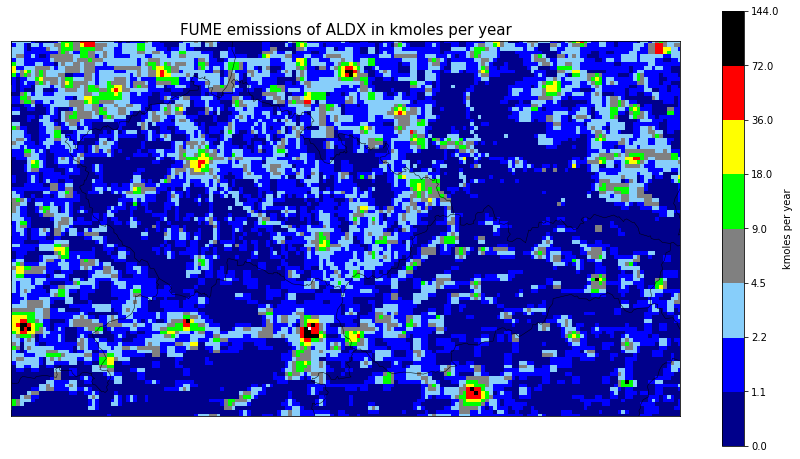

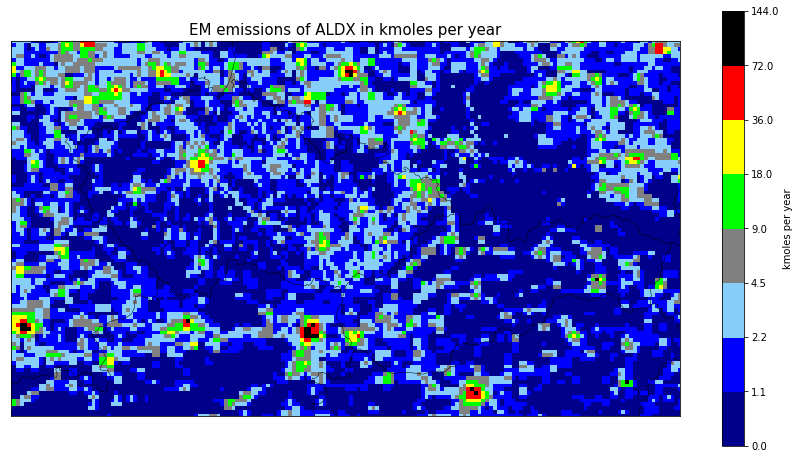

/home/KOL/p6065/anaconda3/envs/geo/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide


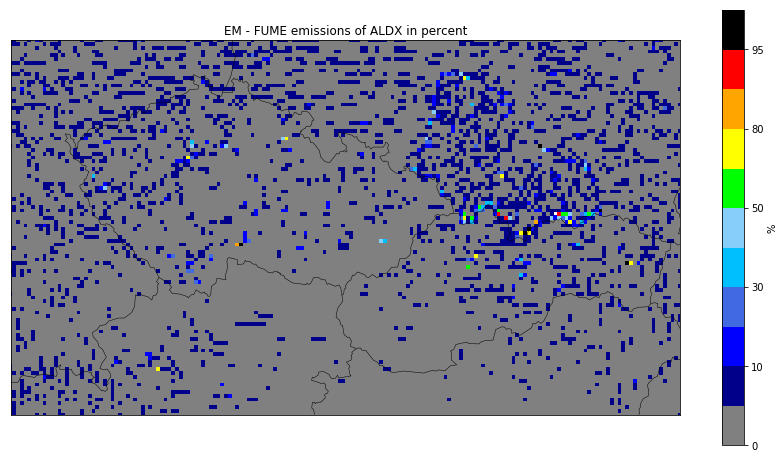

/home/KOL/p6065/anaconda3/envs/geo/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


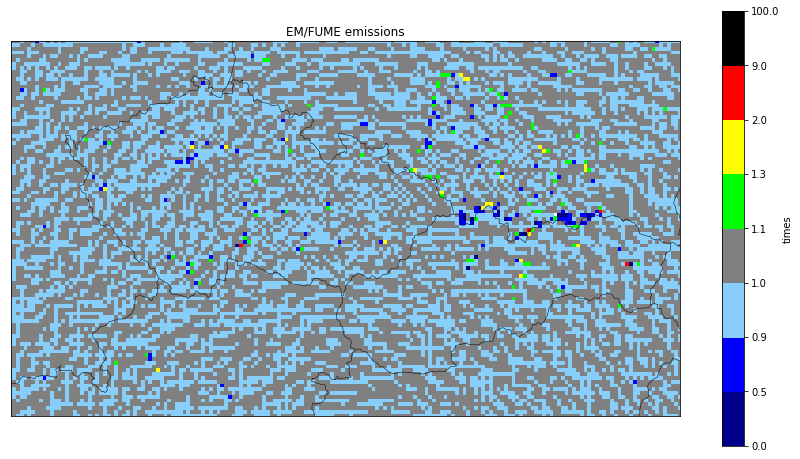

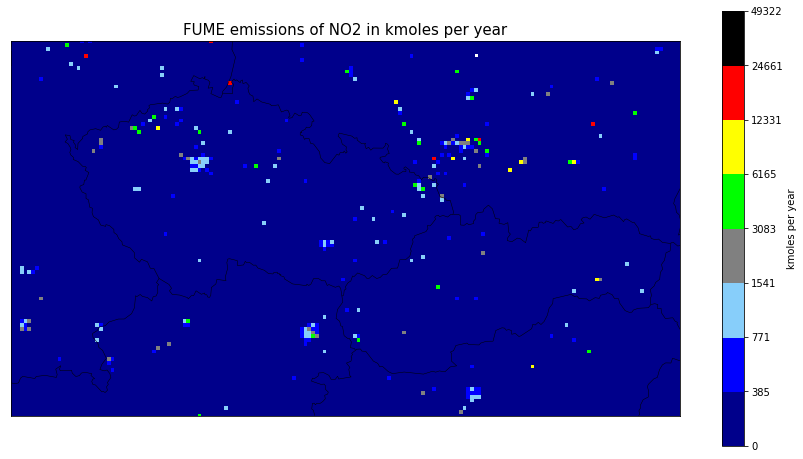

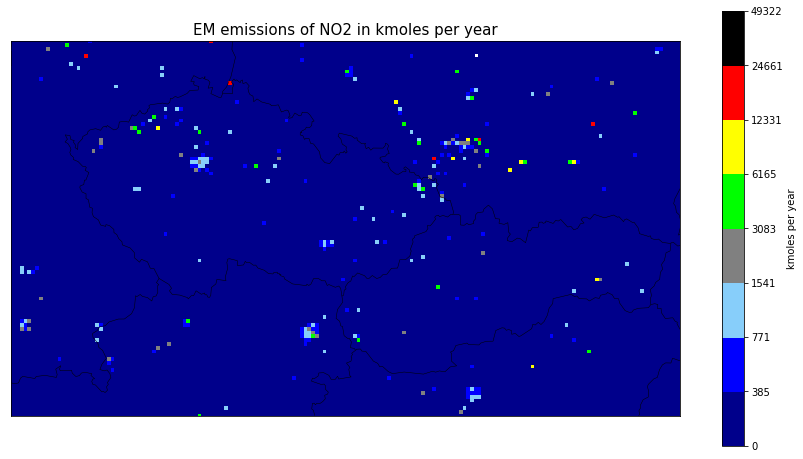

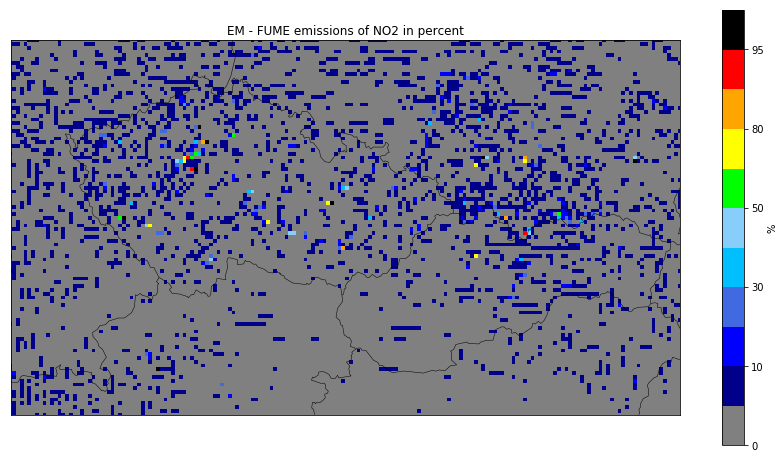

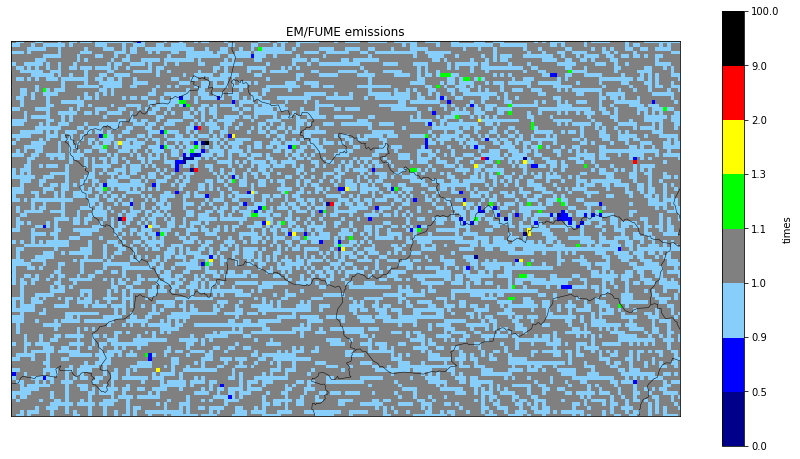

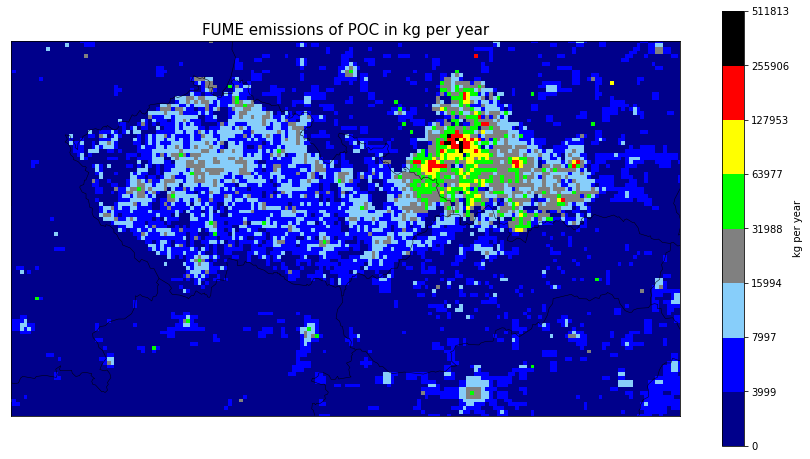

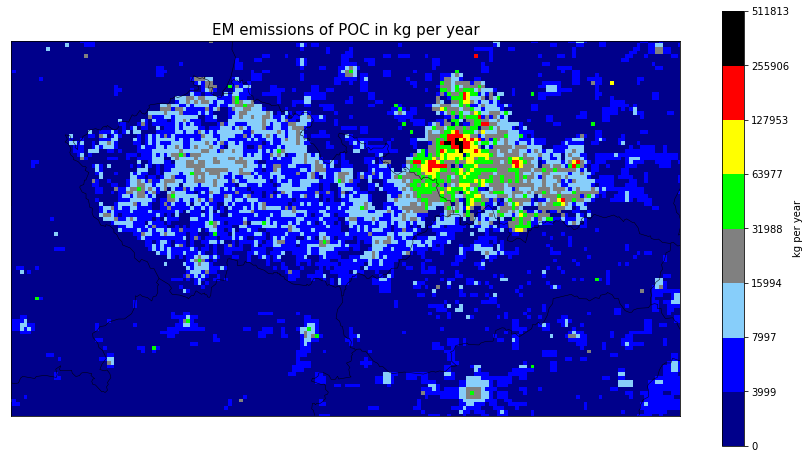

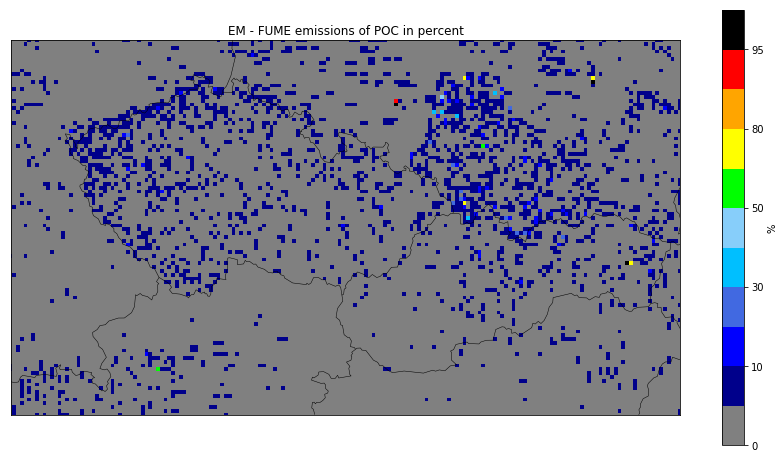

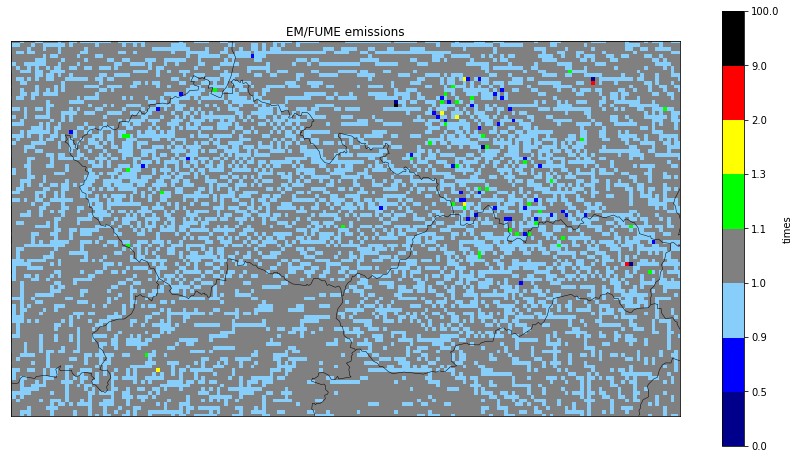

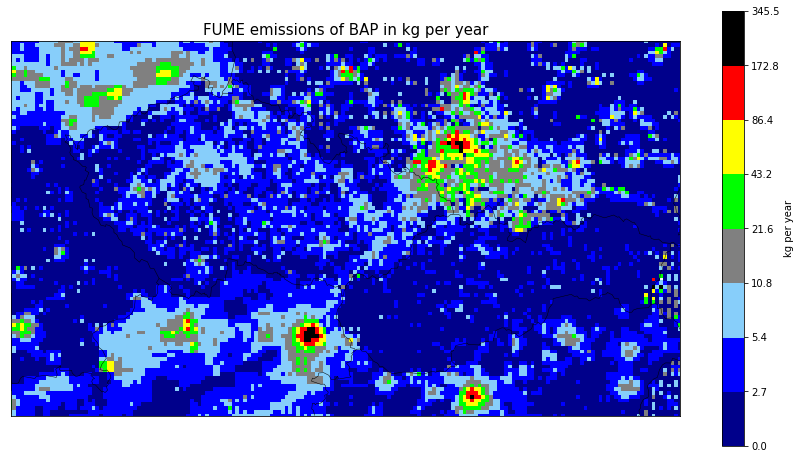

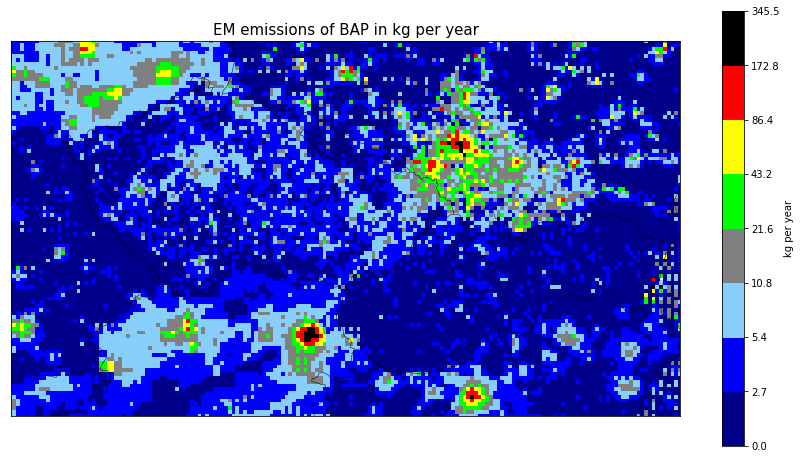

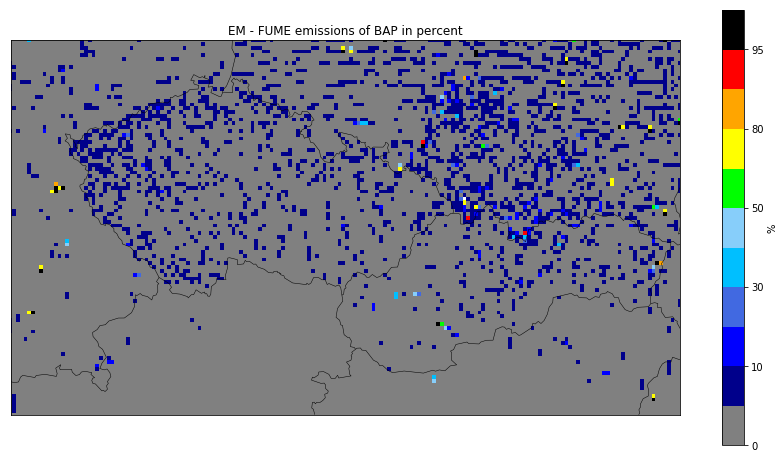

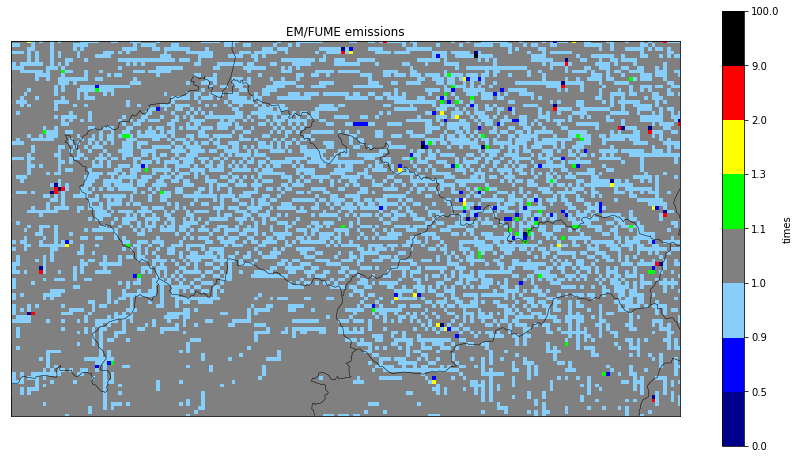

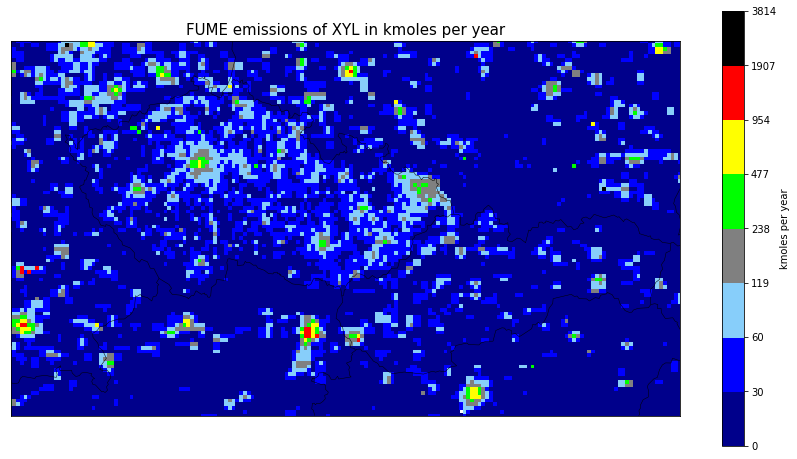

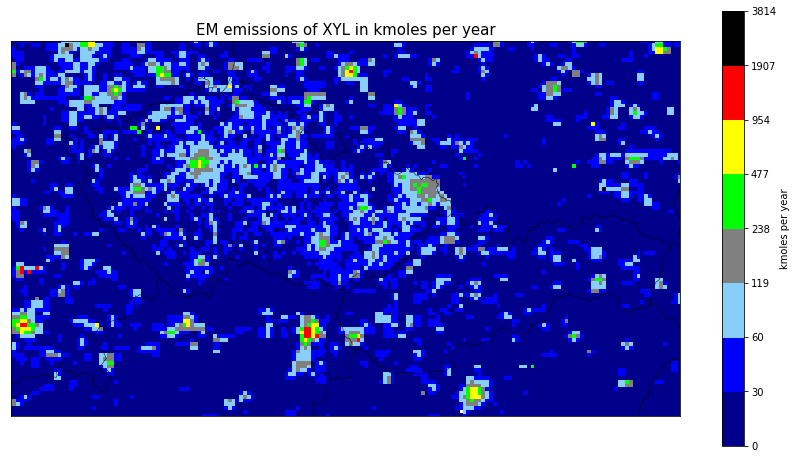

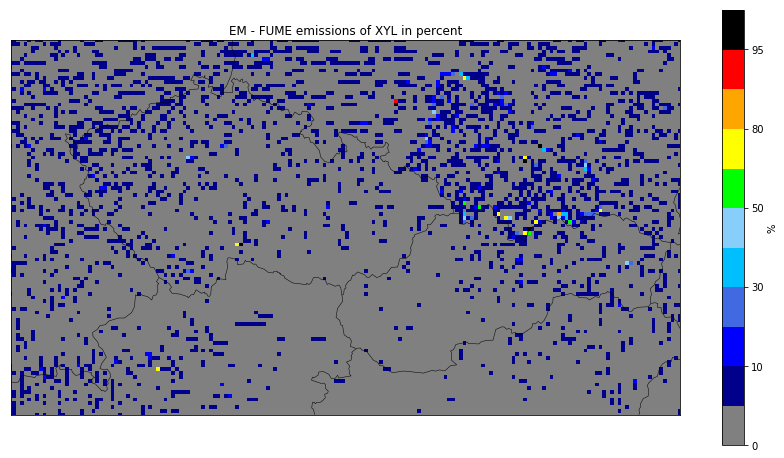

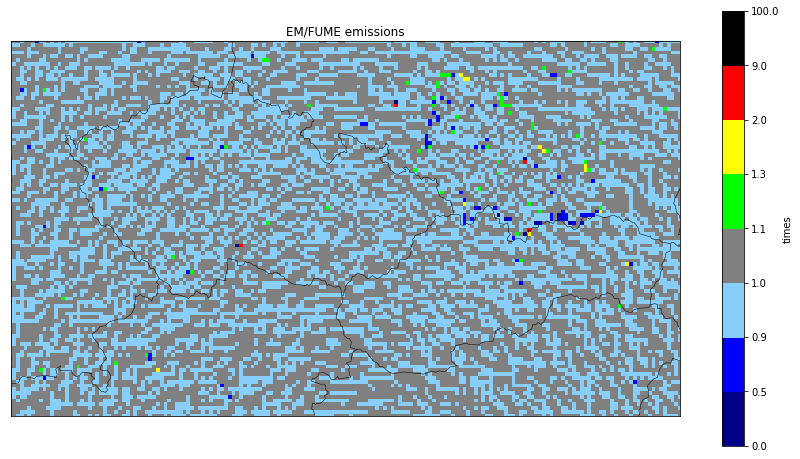

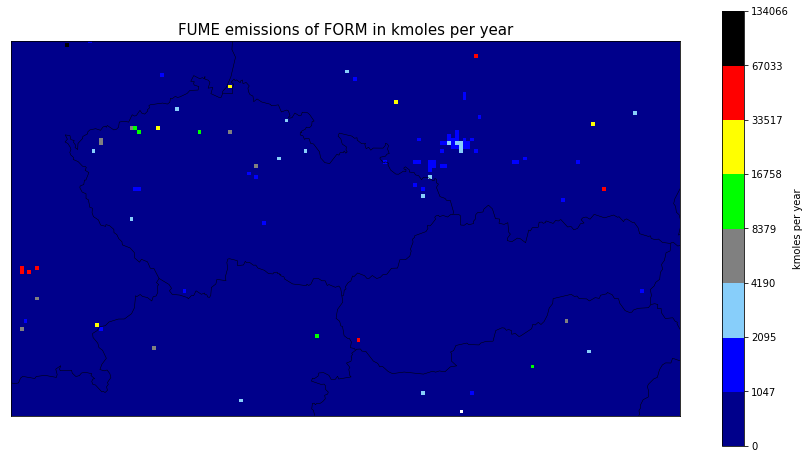

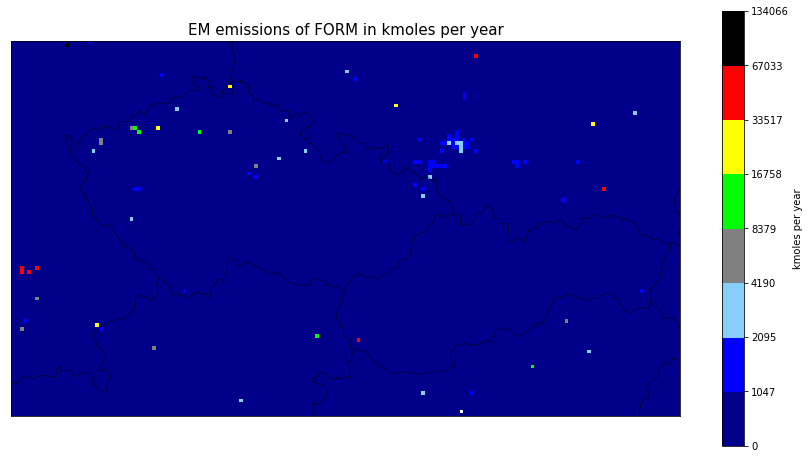

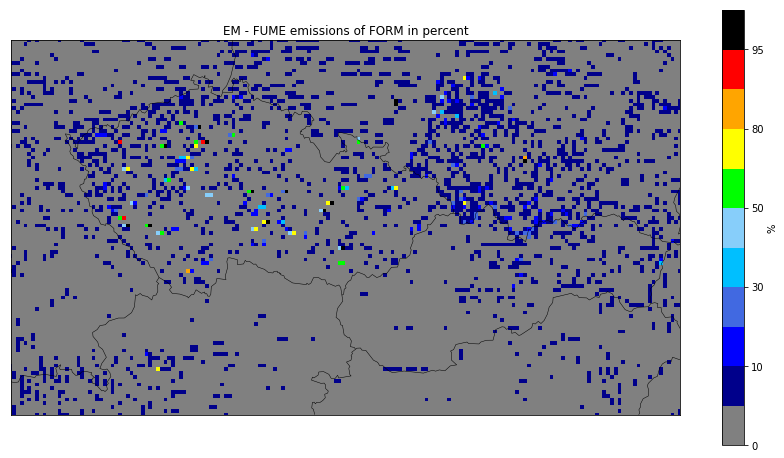

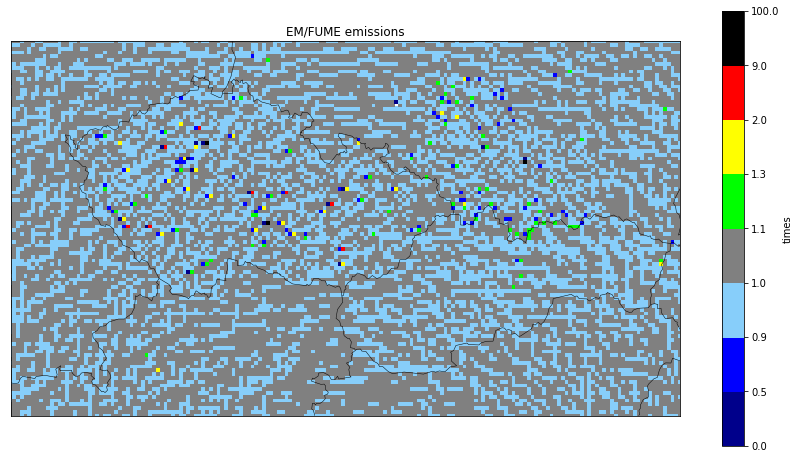

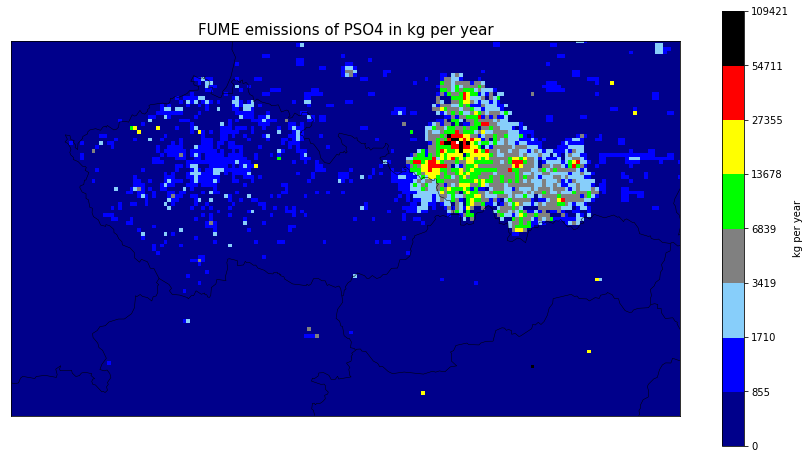

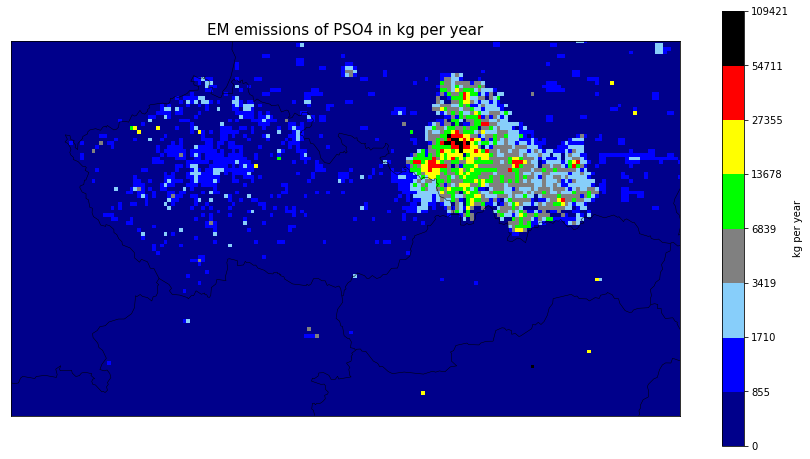

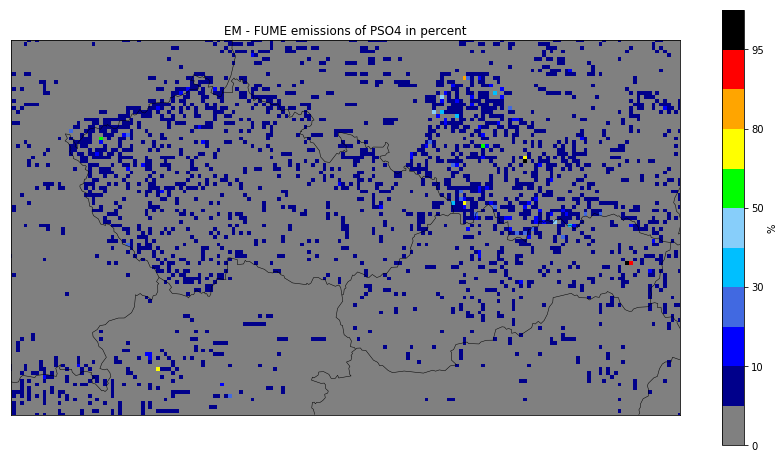

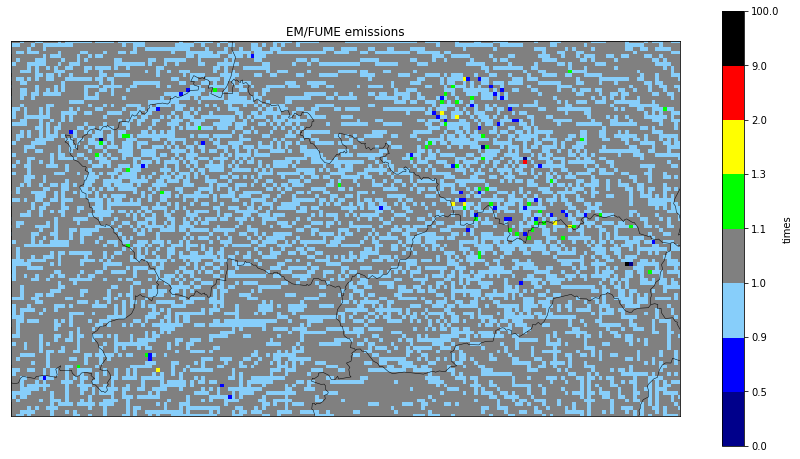

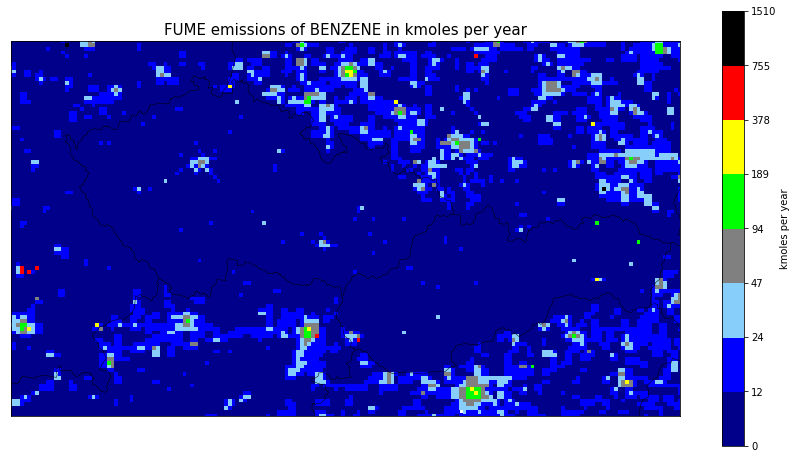

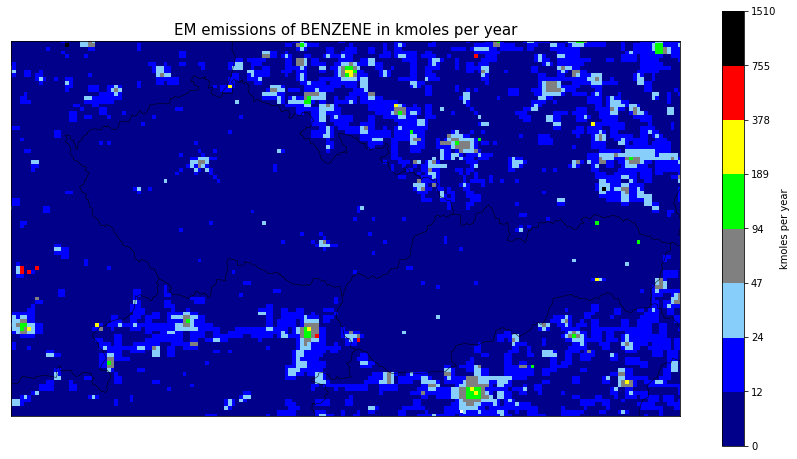

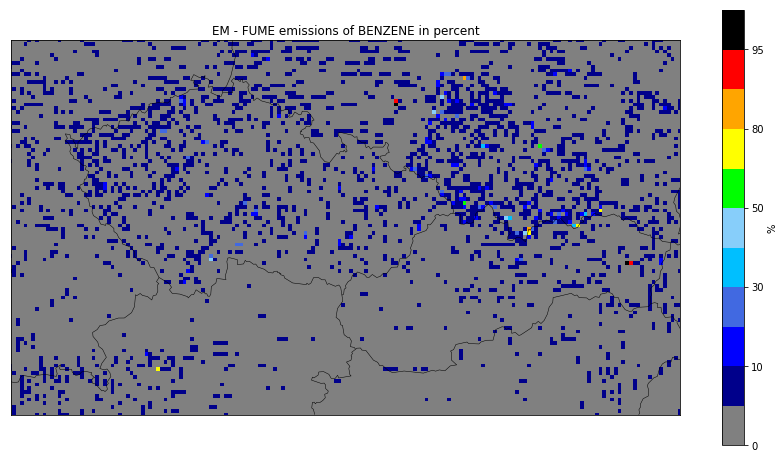

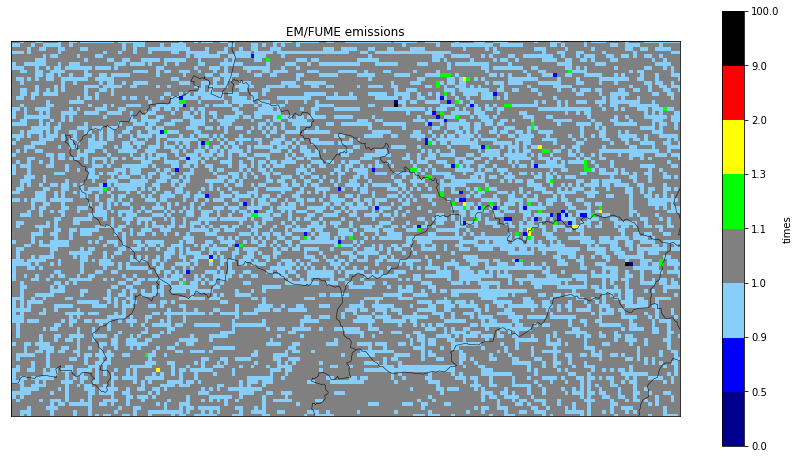

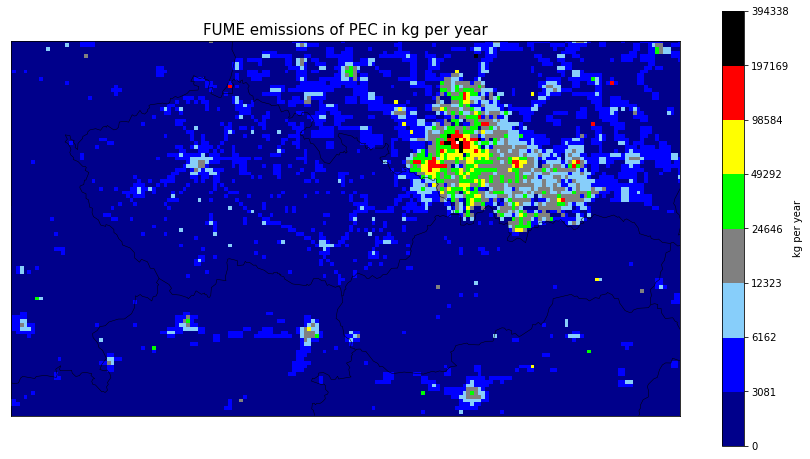

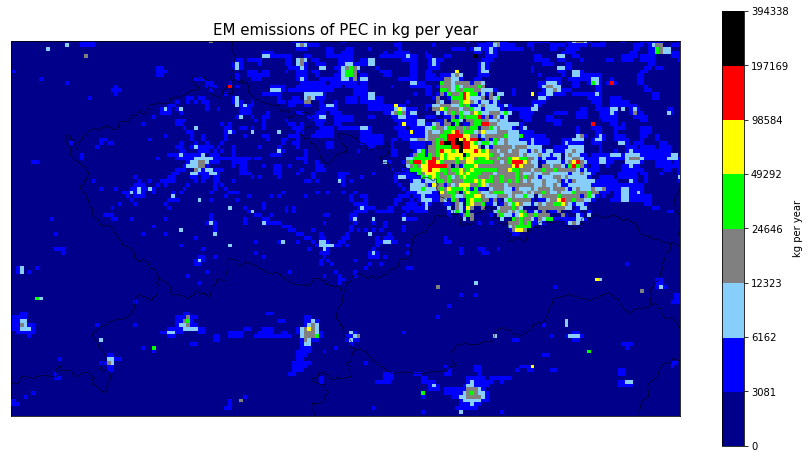

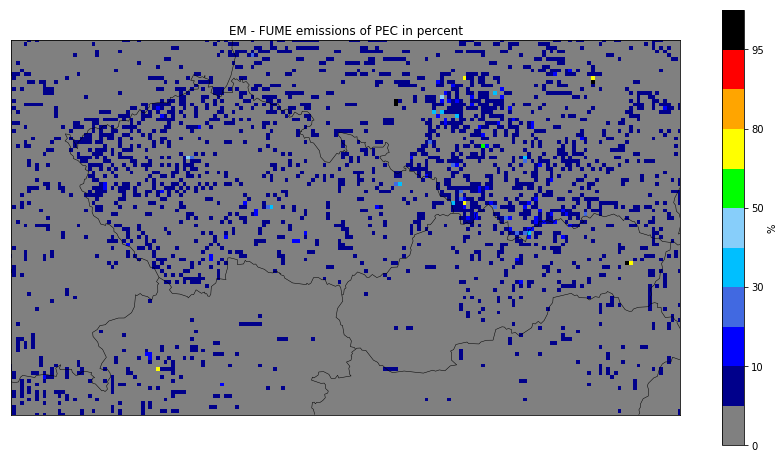

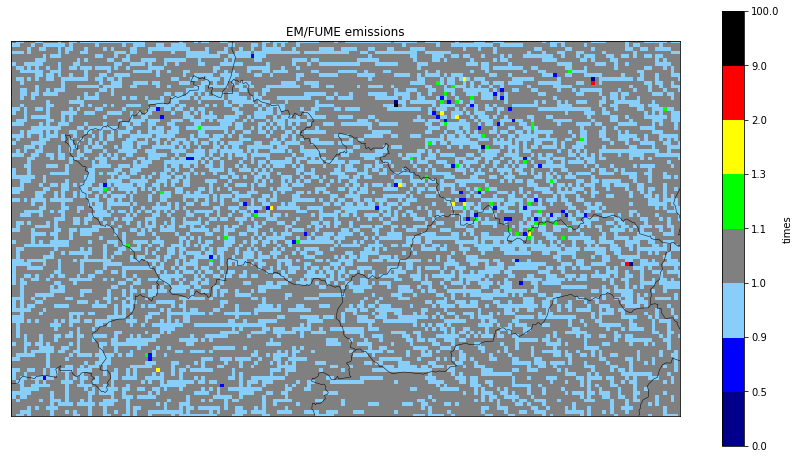

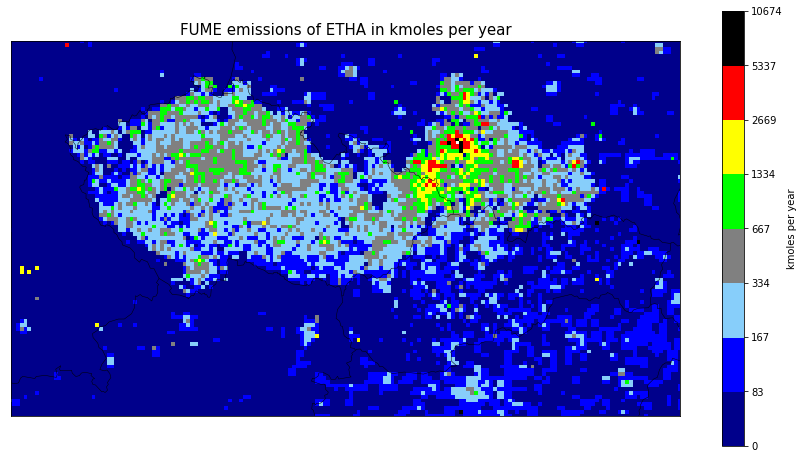

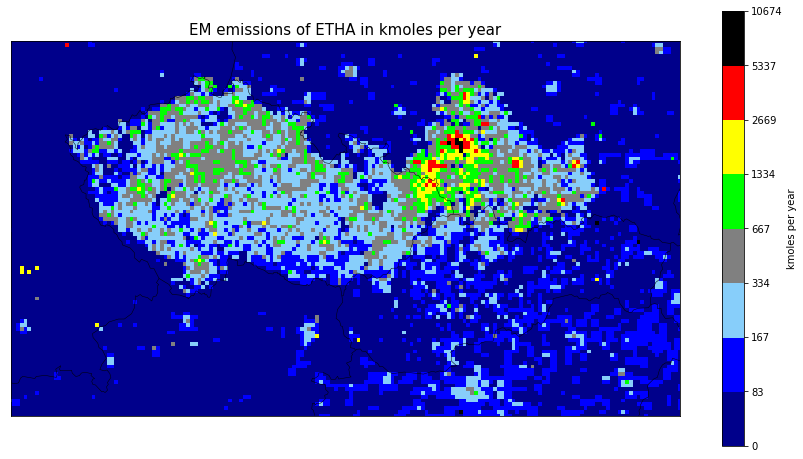

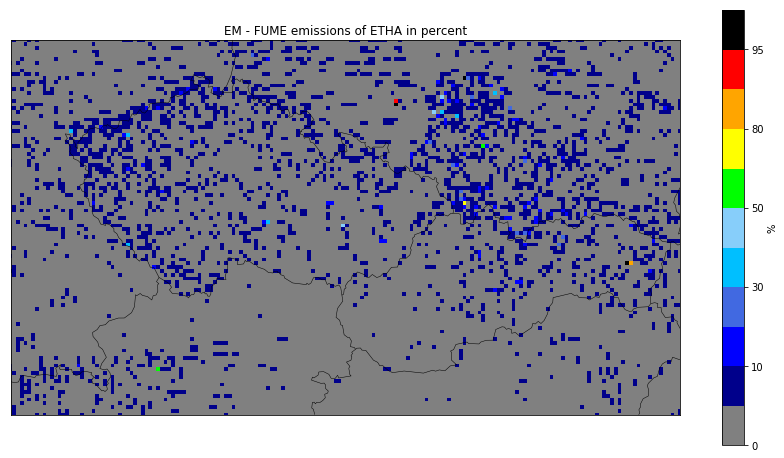

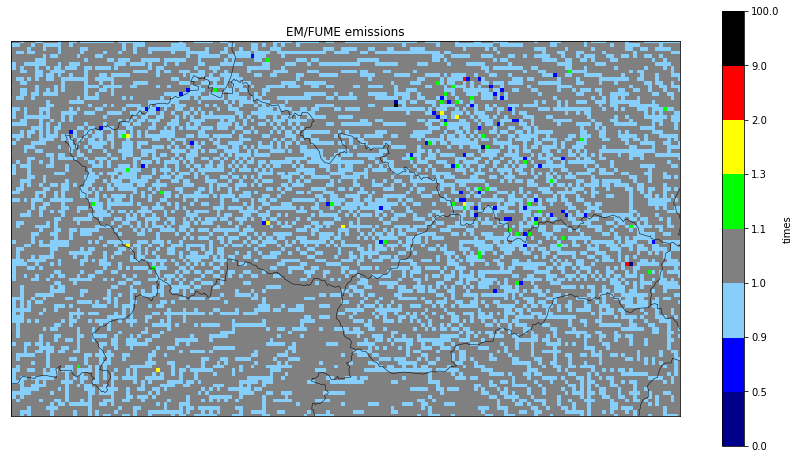

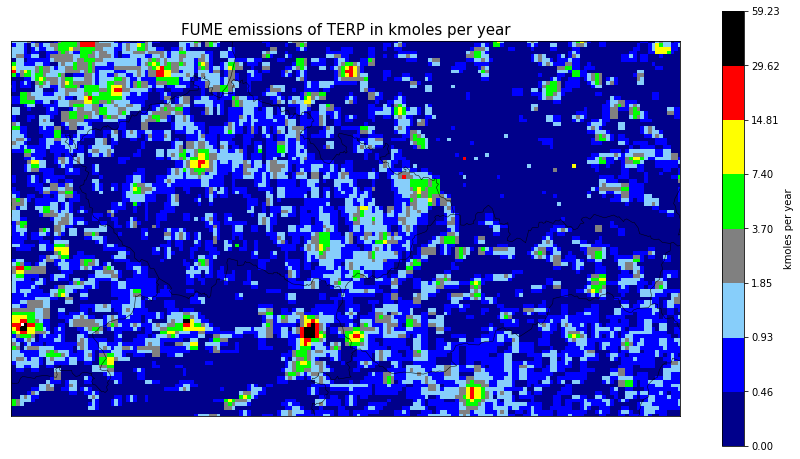

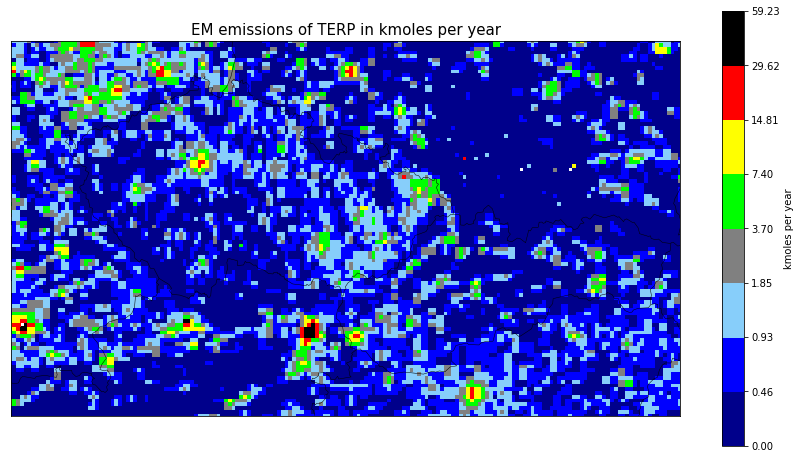

/home/KOL/p6065/anaconda3/envs/geo/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide


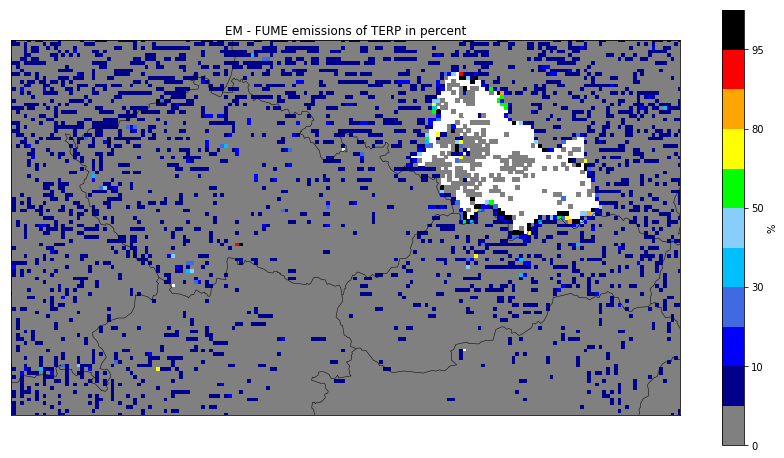

/home/KOL/p6065/anaconda3/envs/geo/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in true_divide


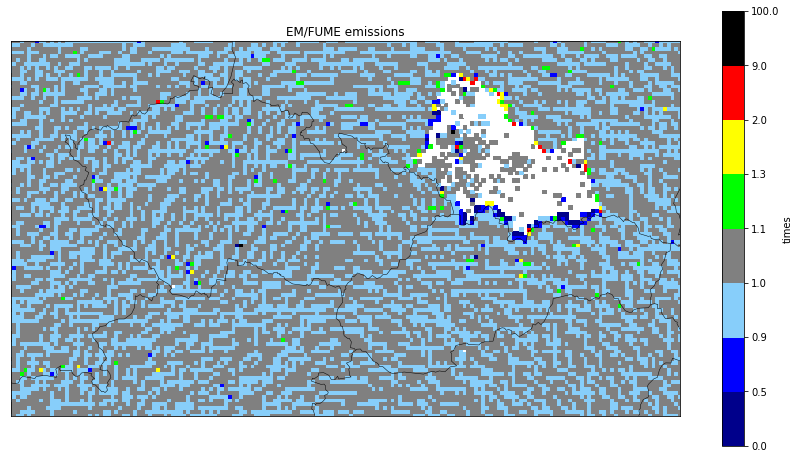

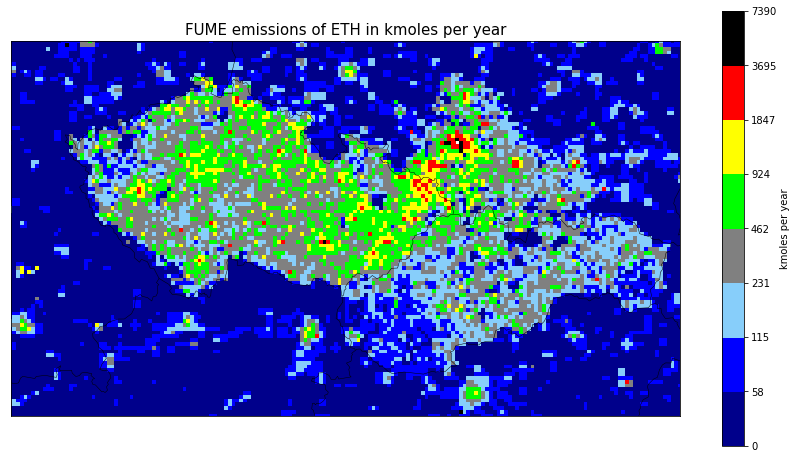

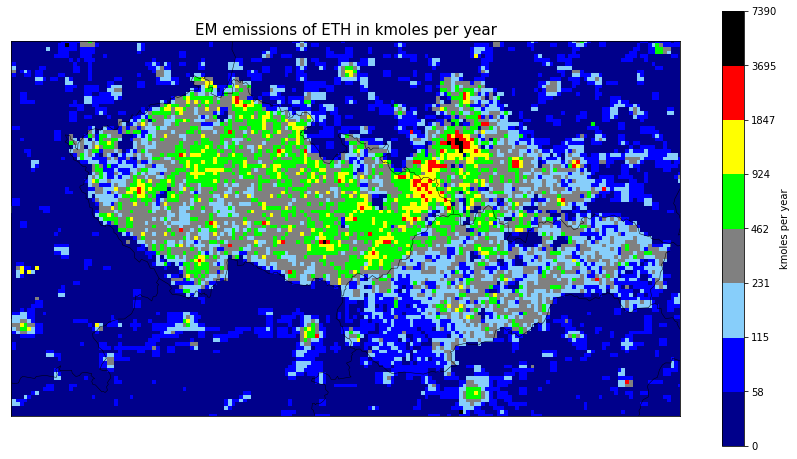

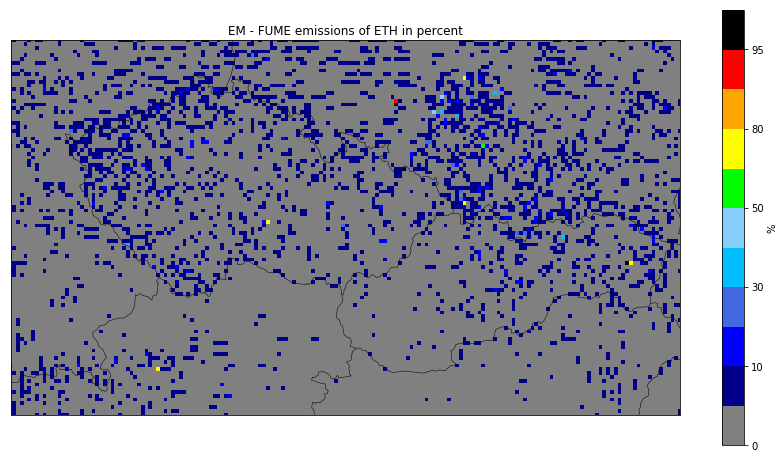

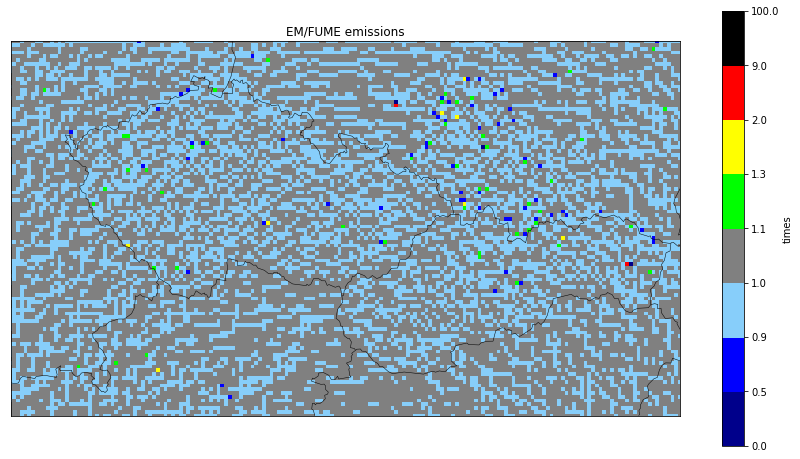

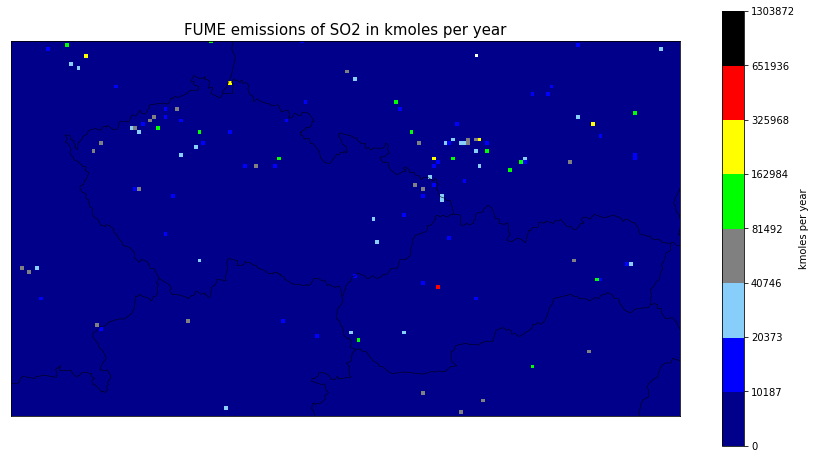

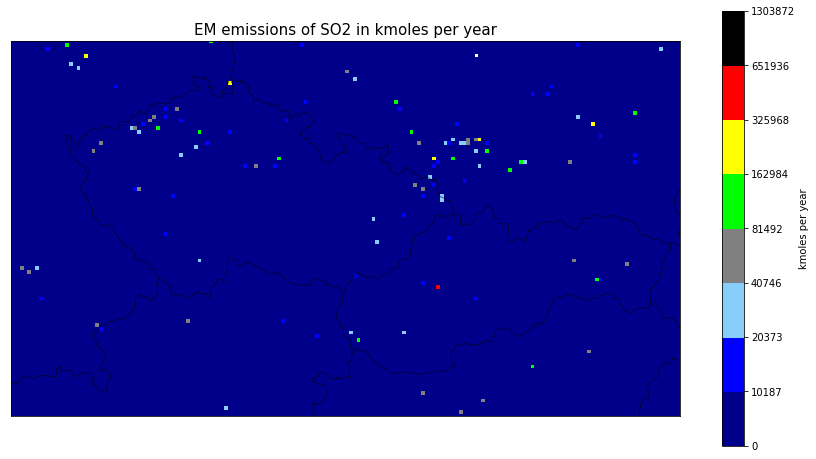

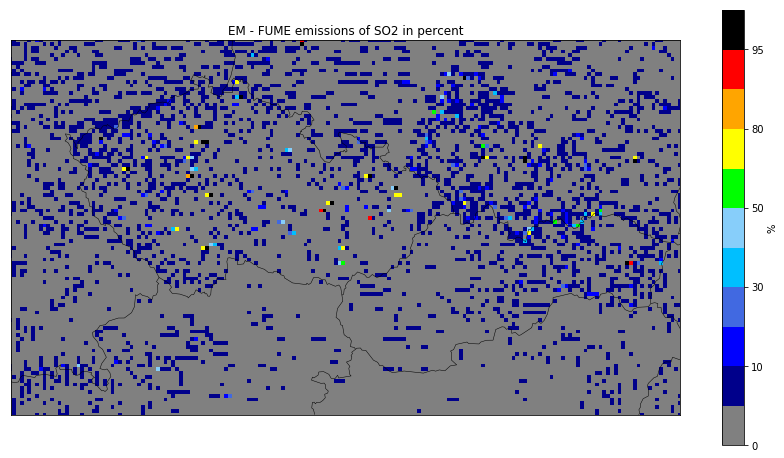

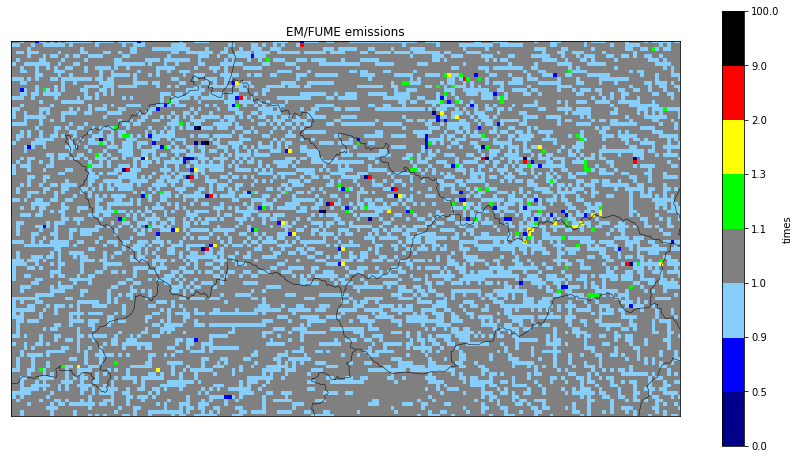

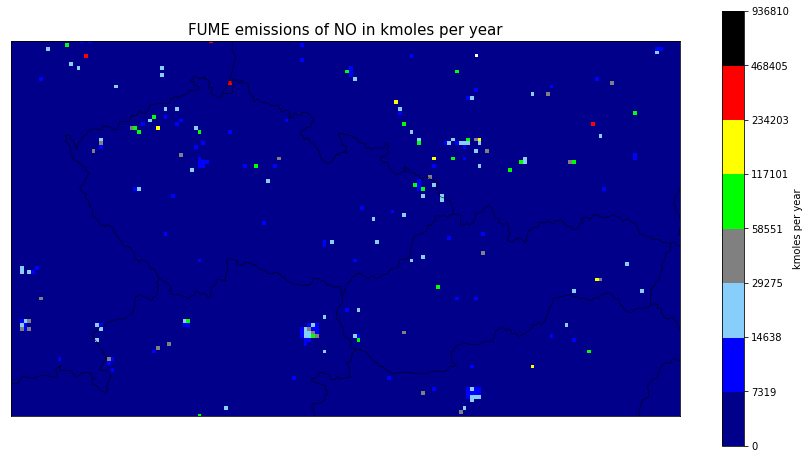

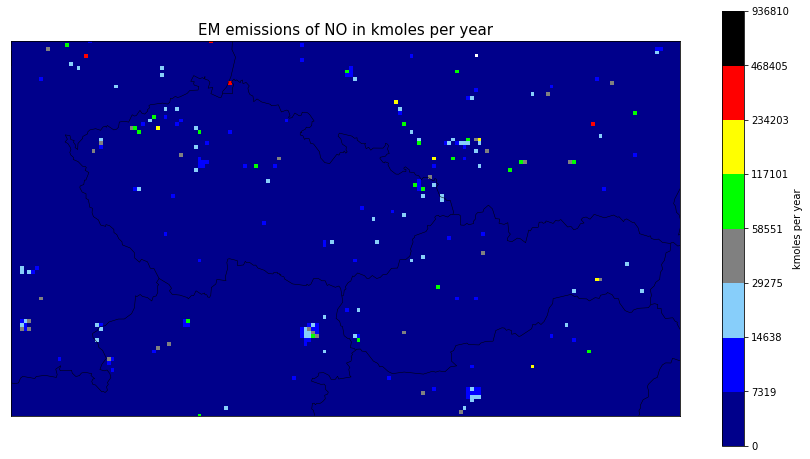

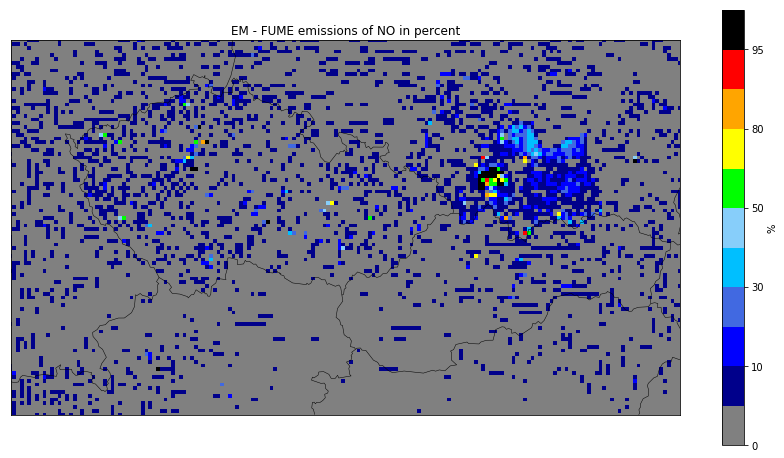

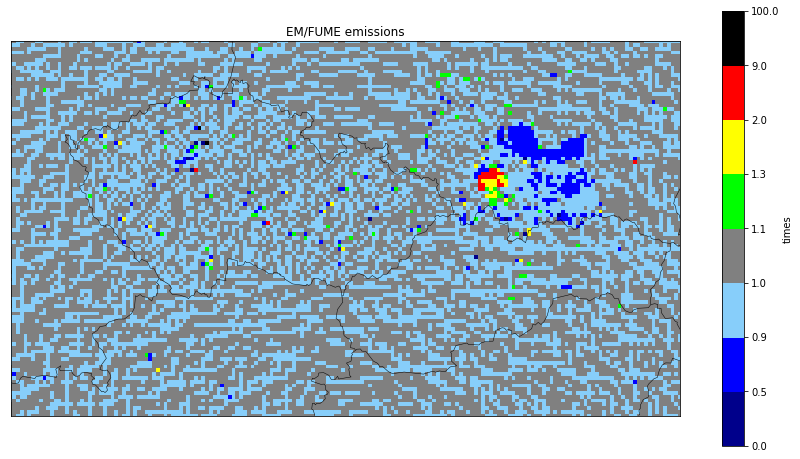

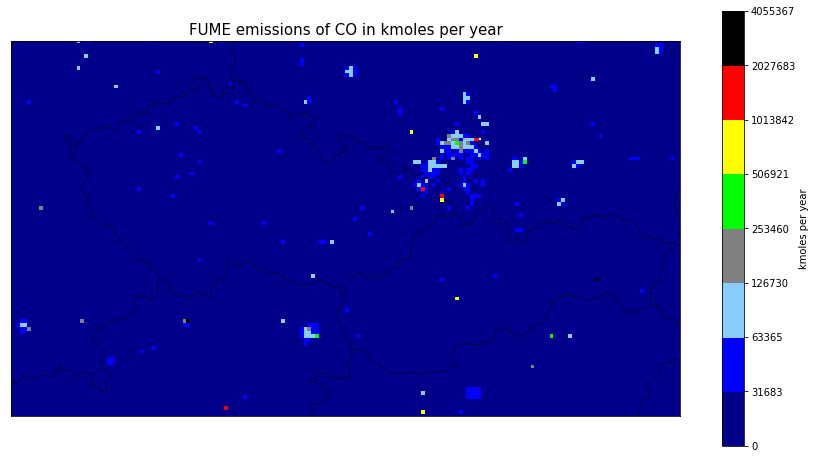

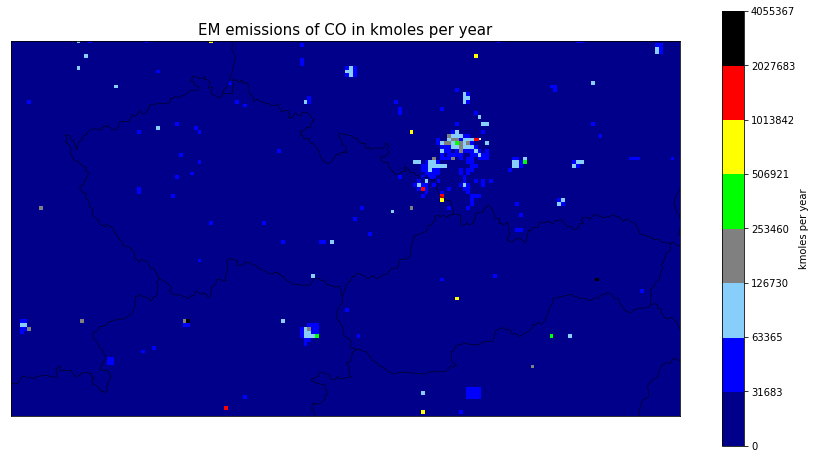

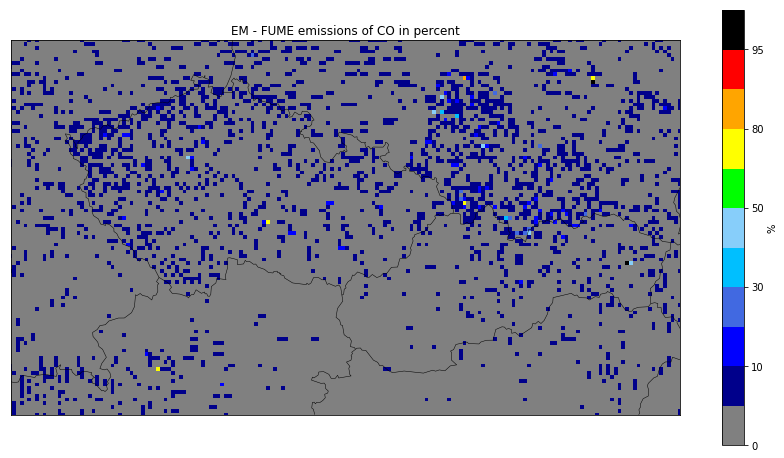

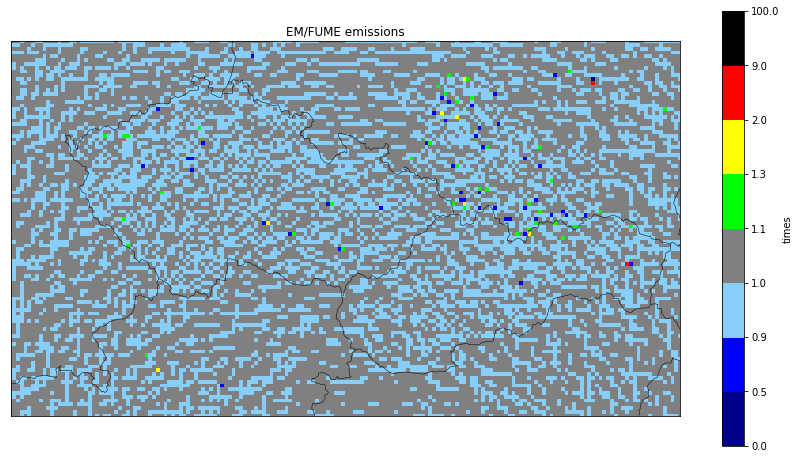

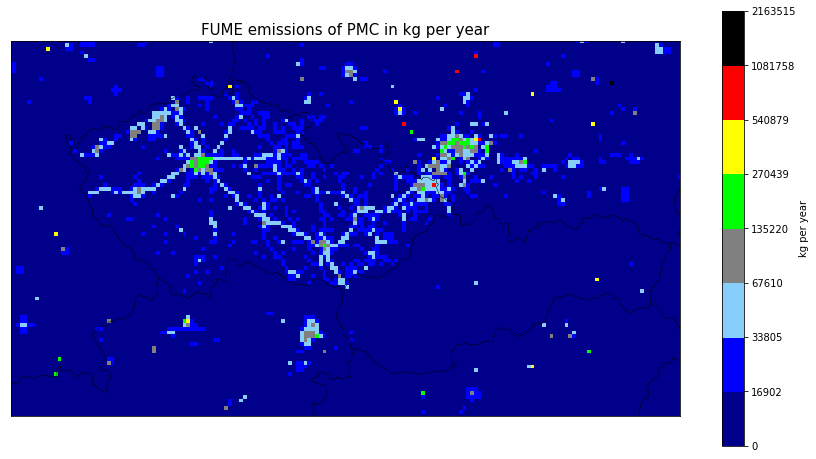

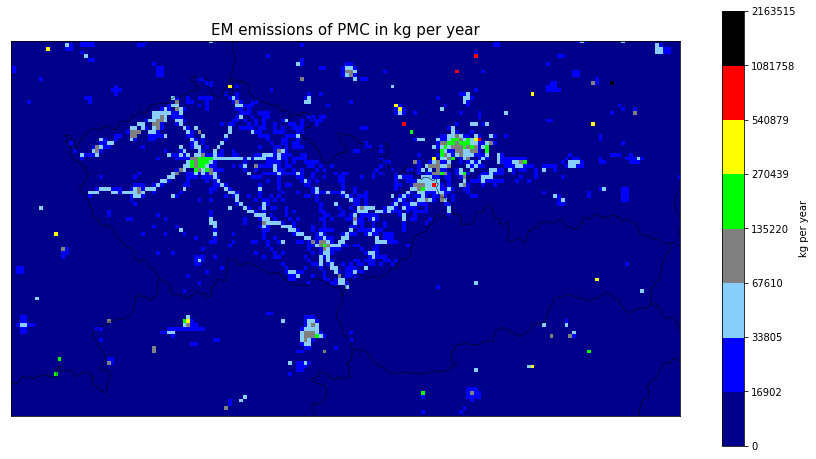

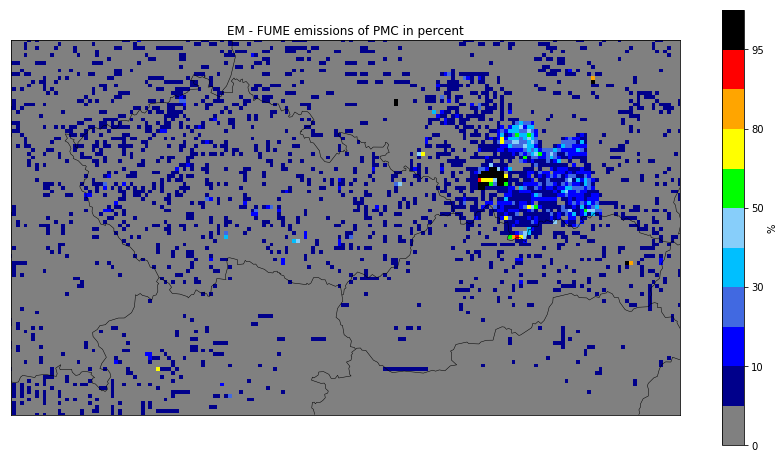

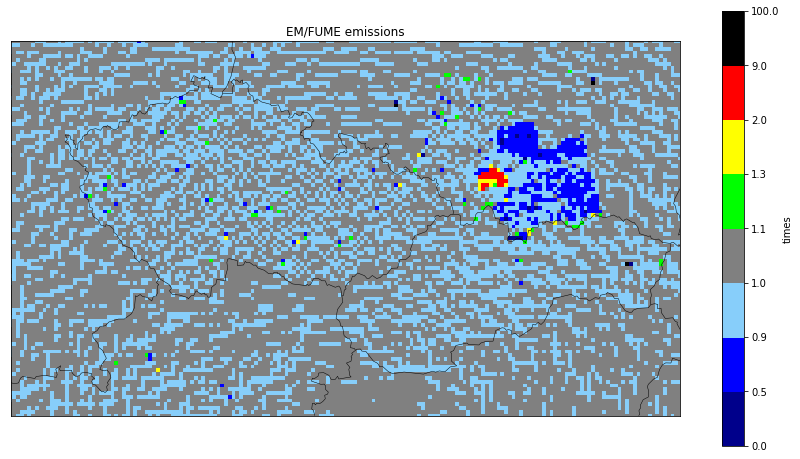

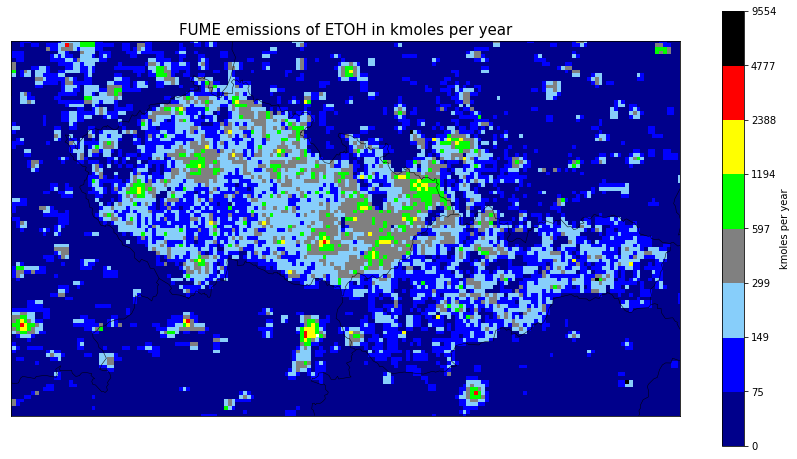

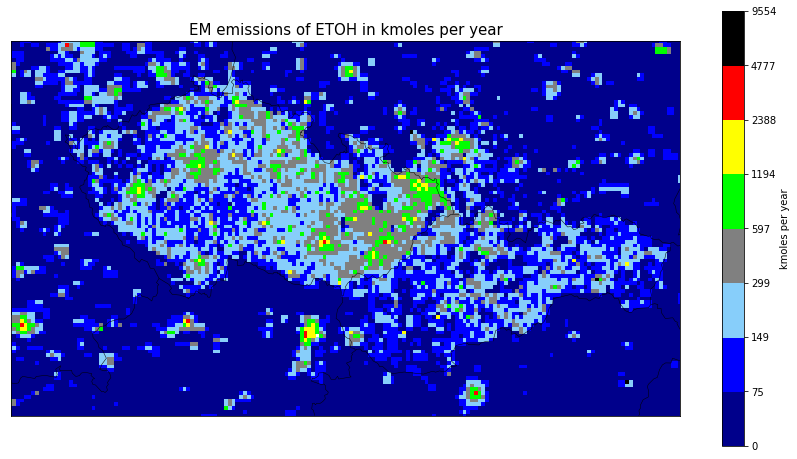

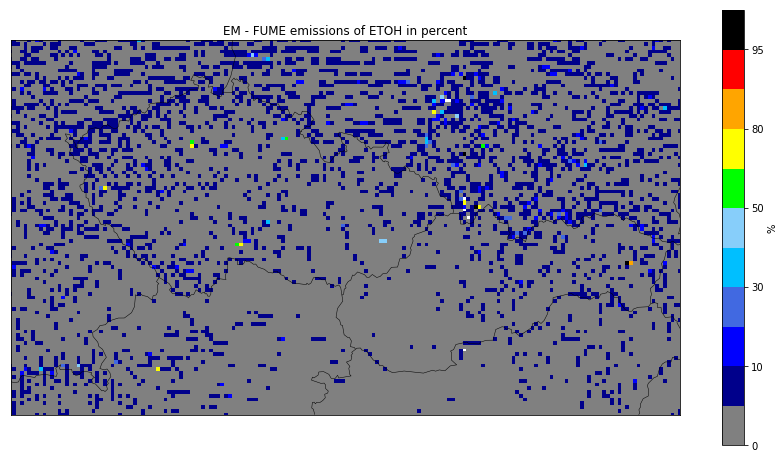

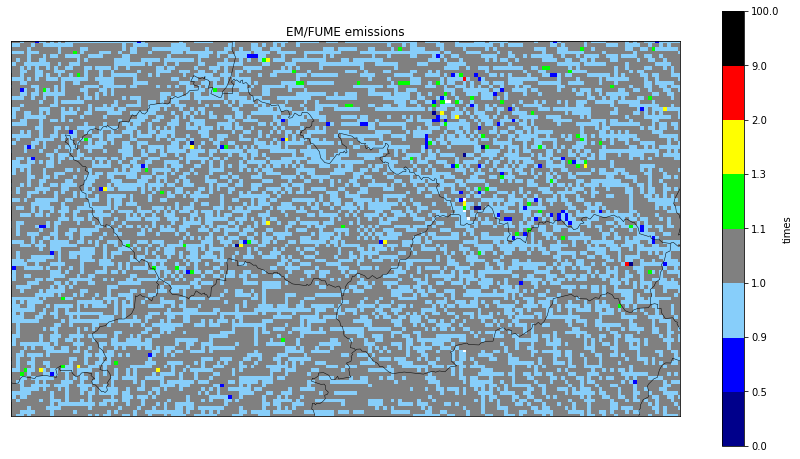

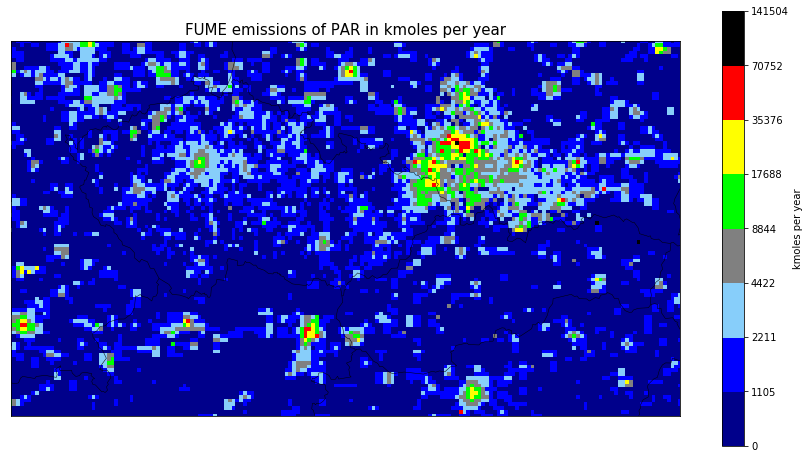

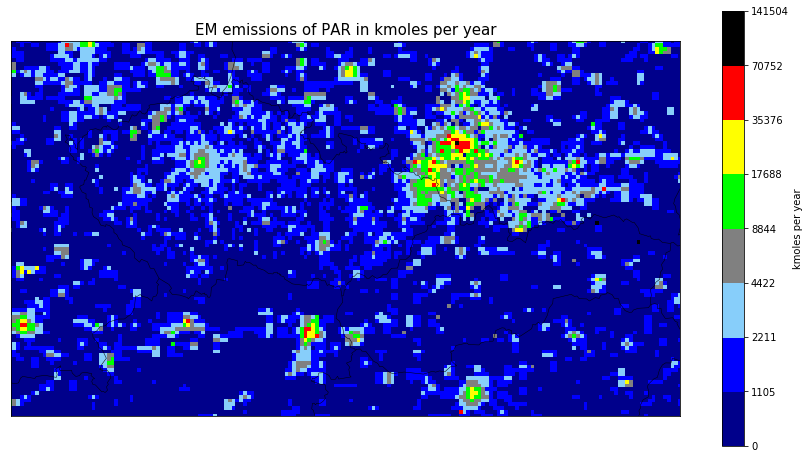

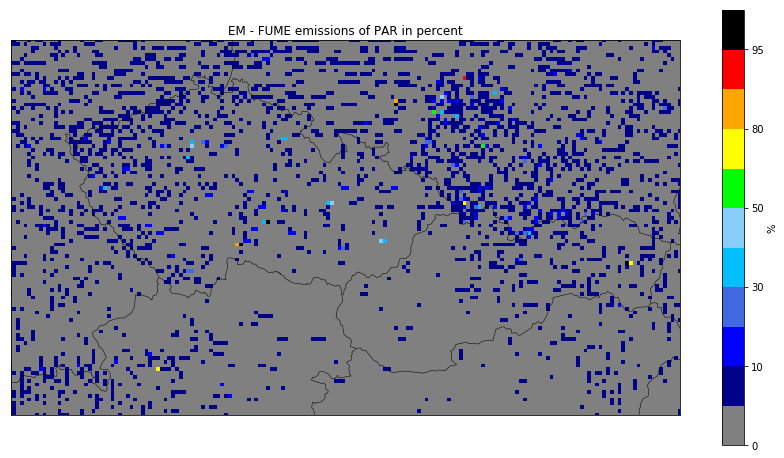

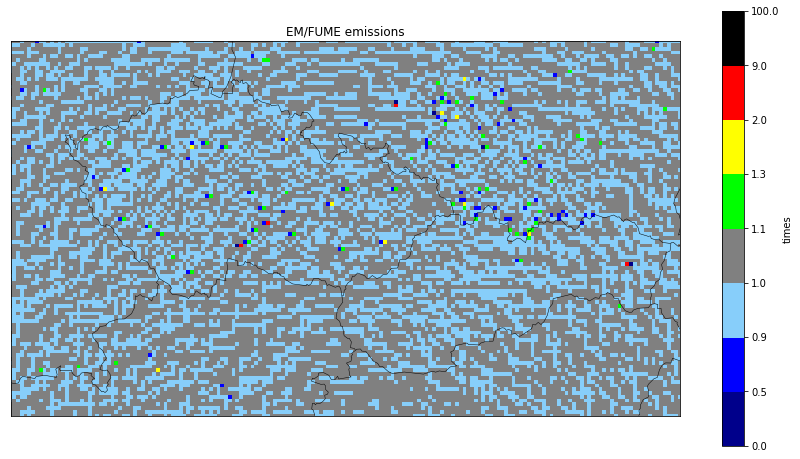

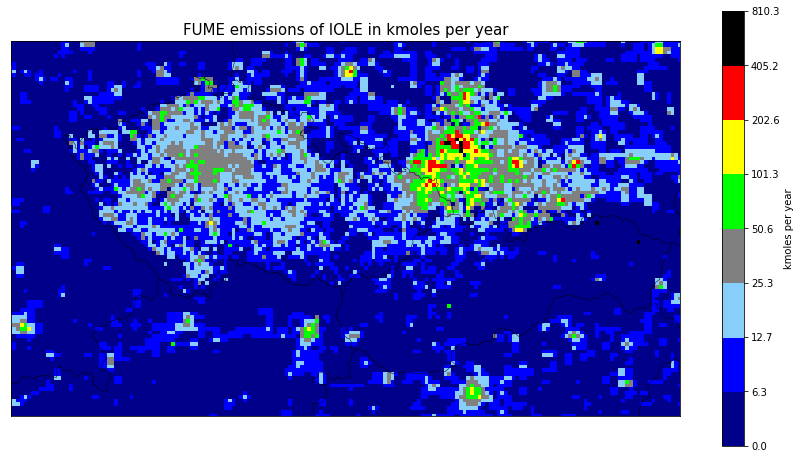

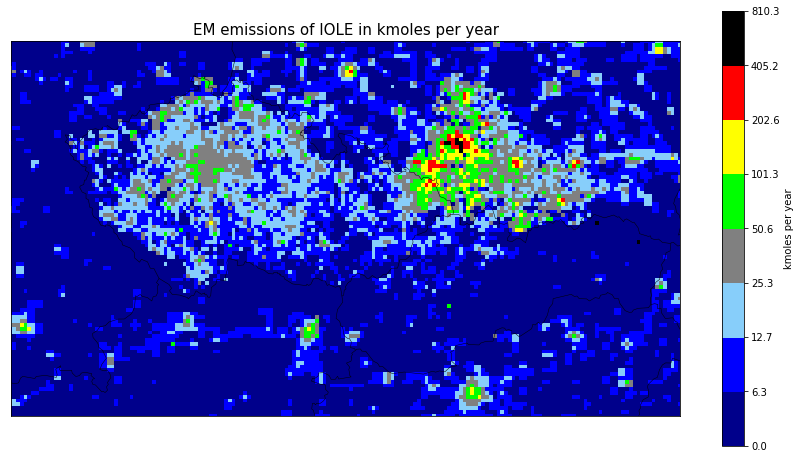

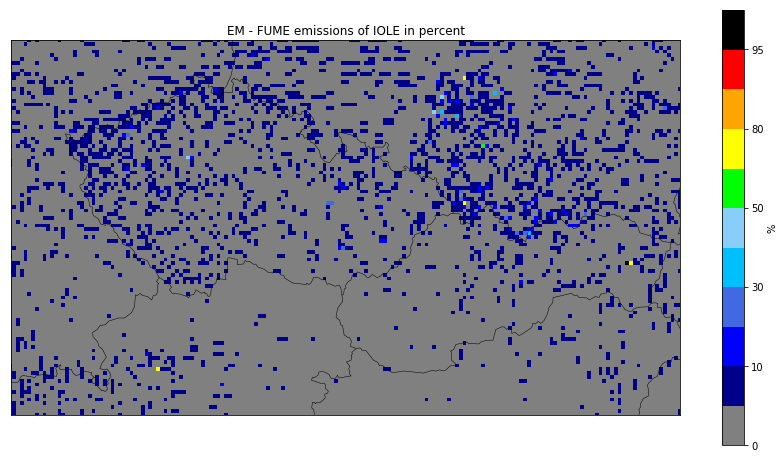

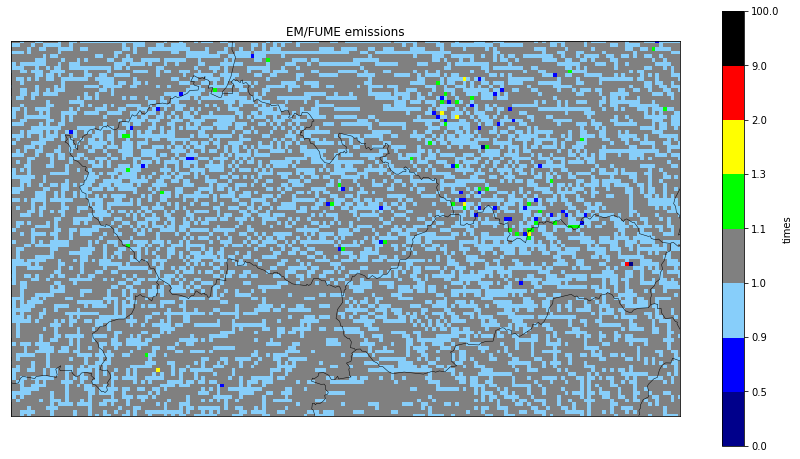

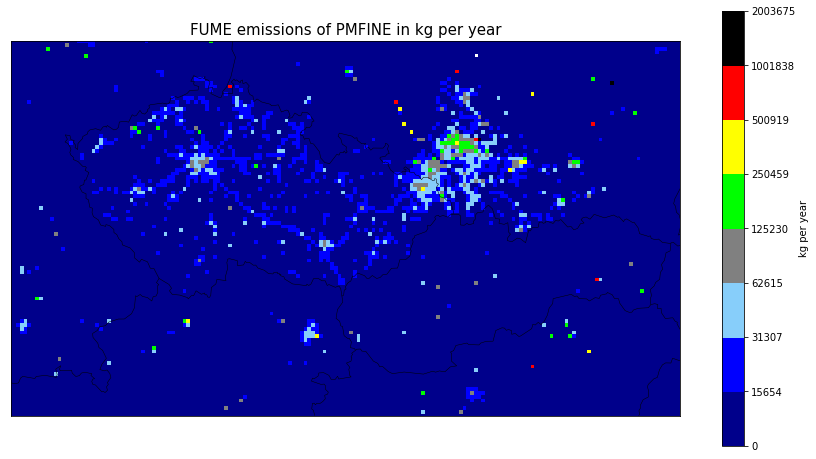

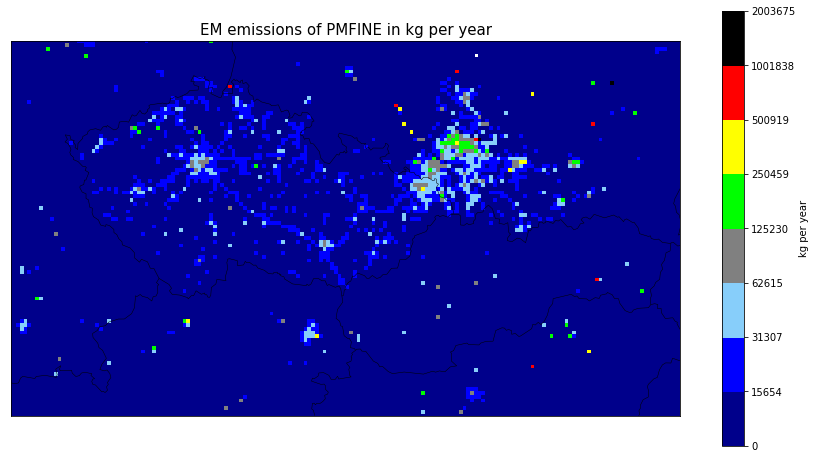

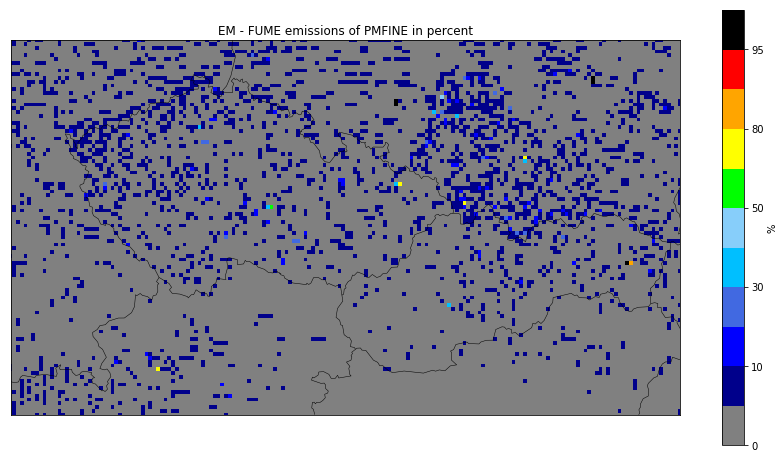

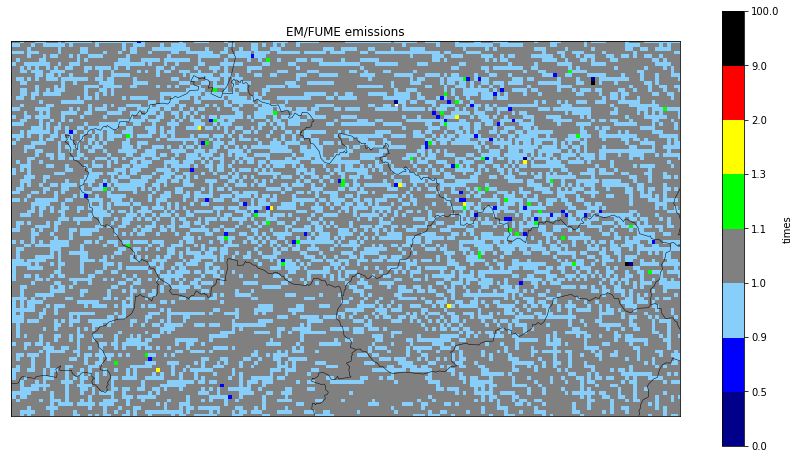

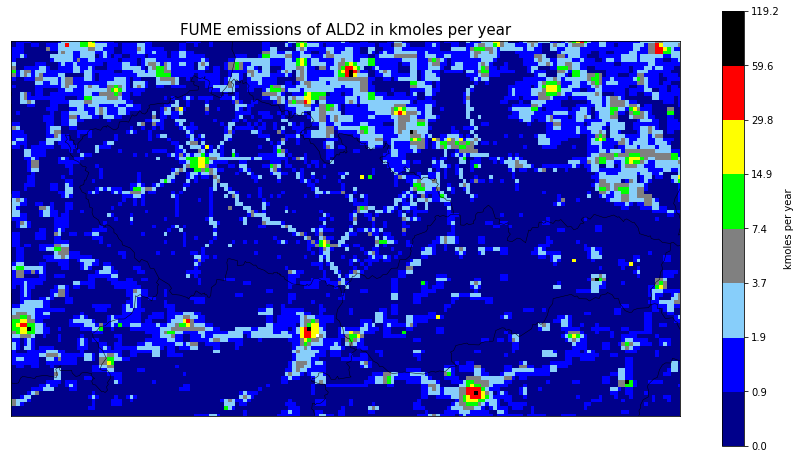

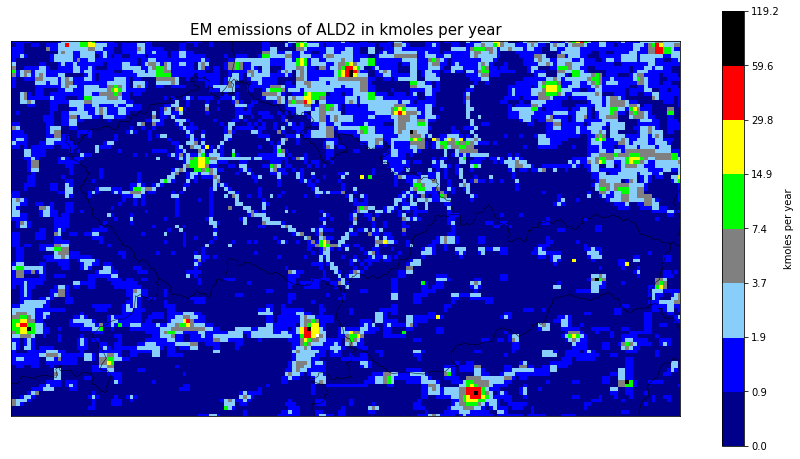

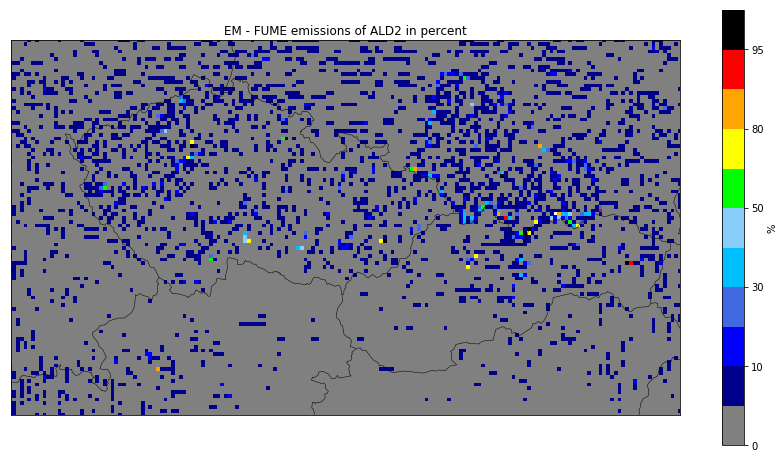

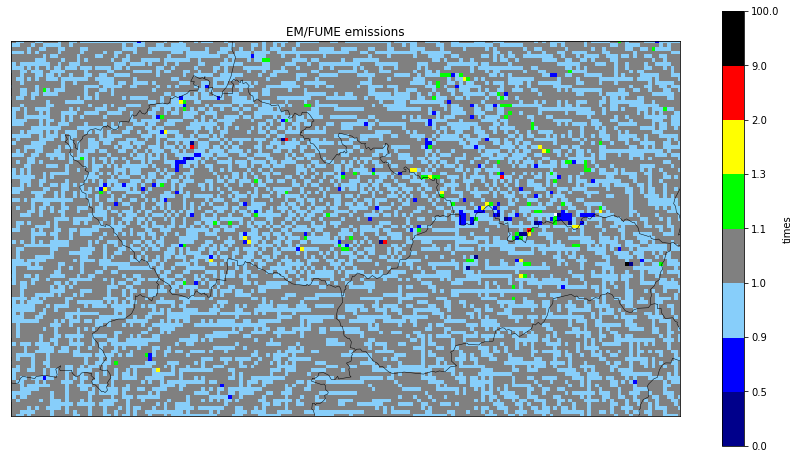

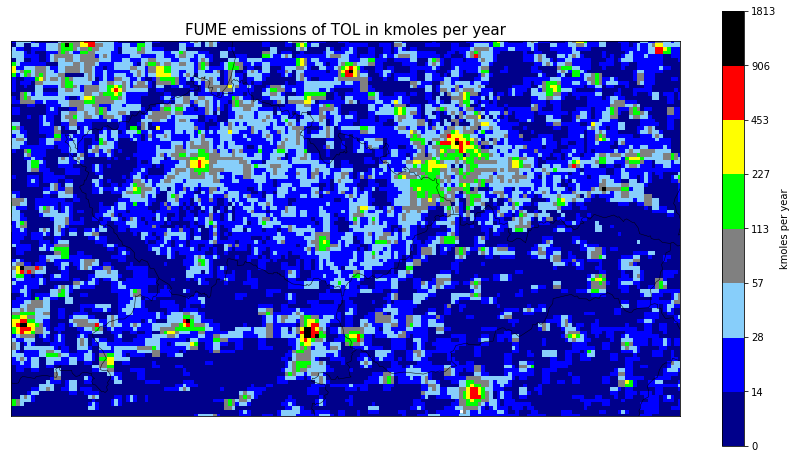

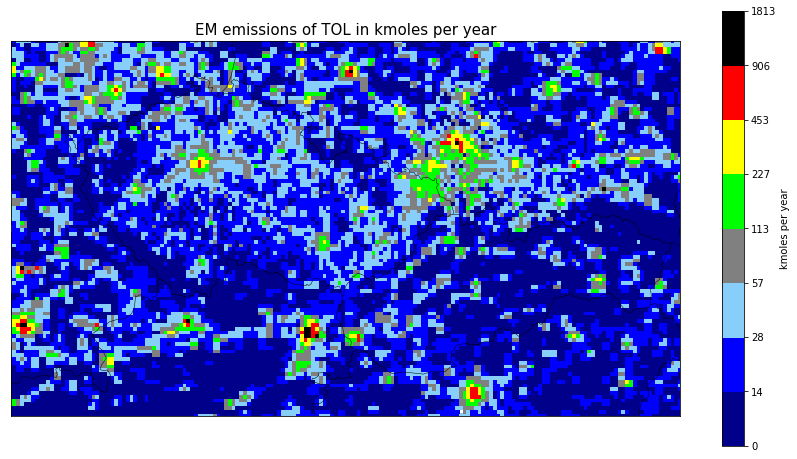

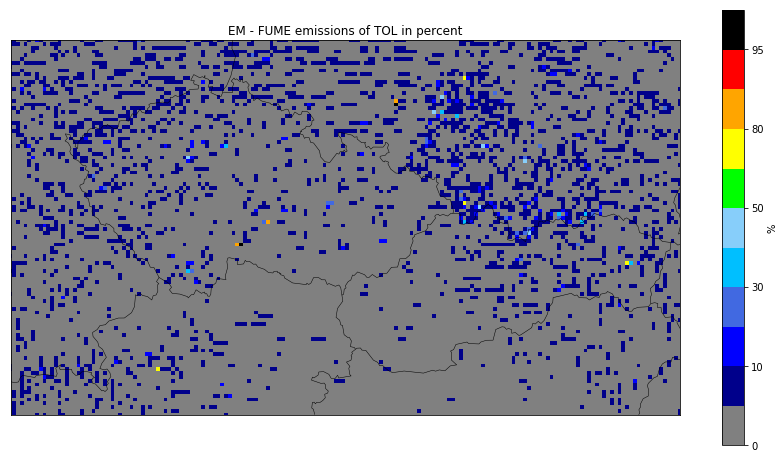

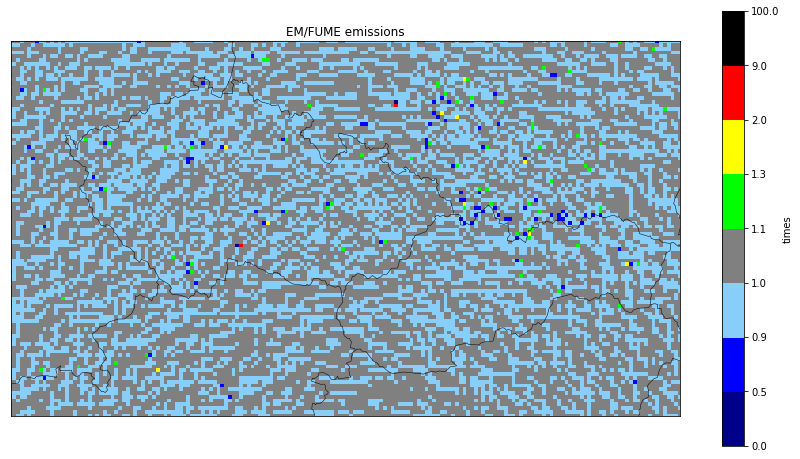

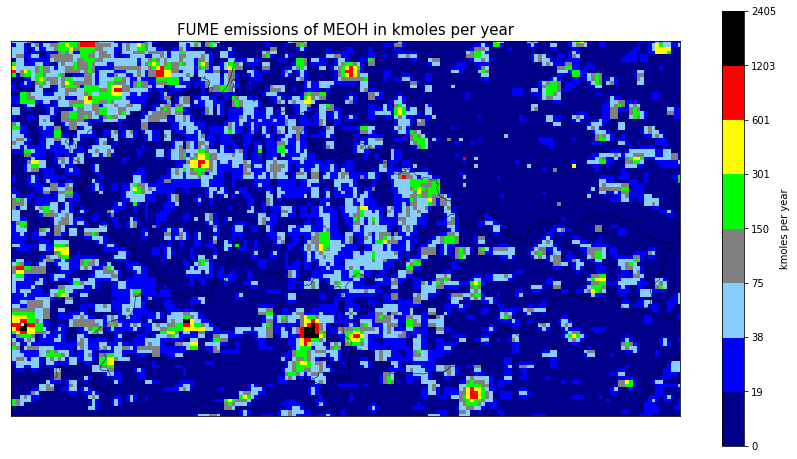

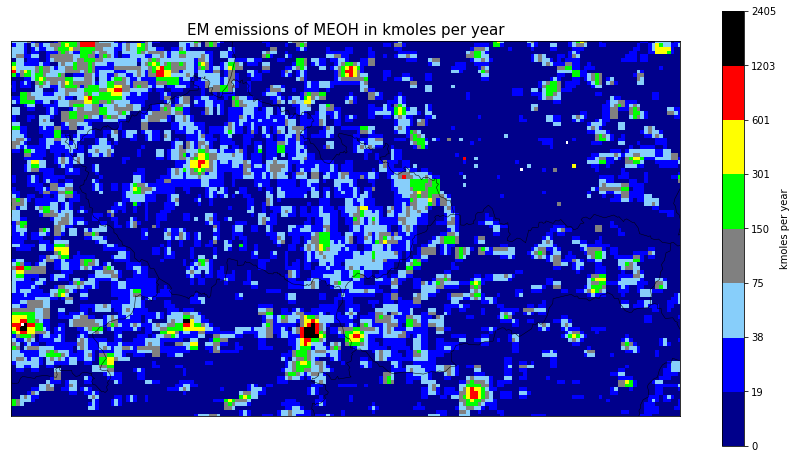

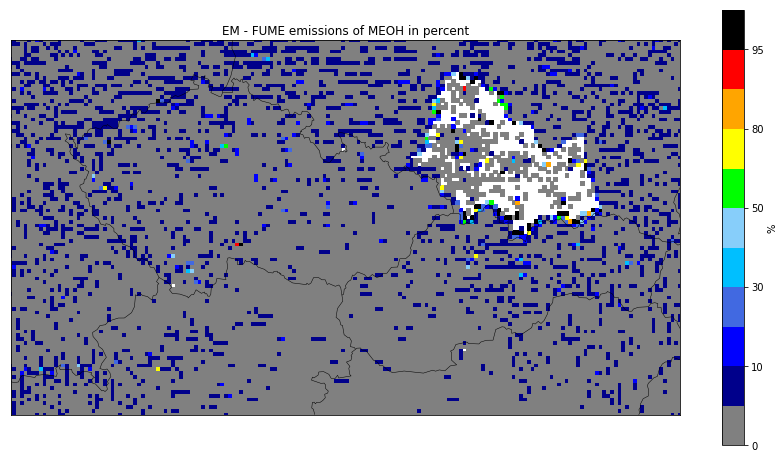

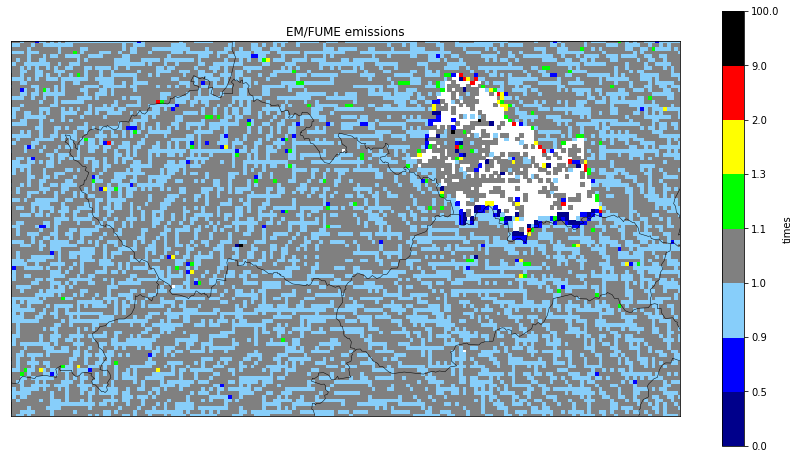

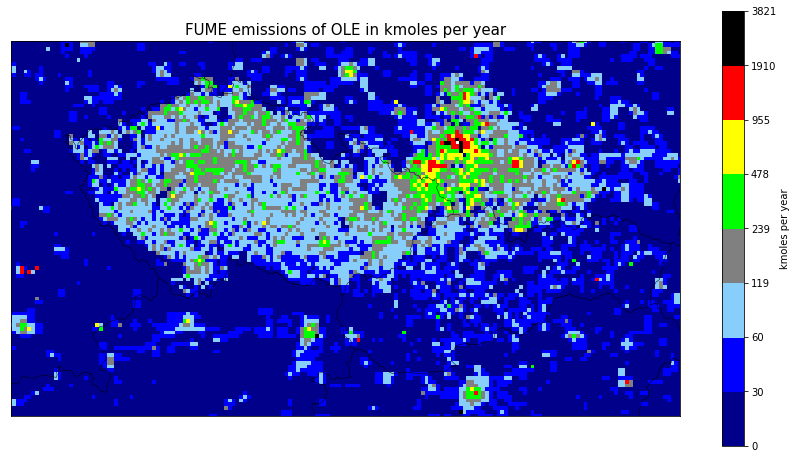

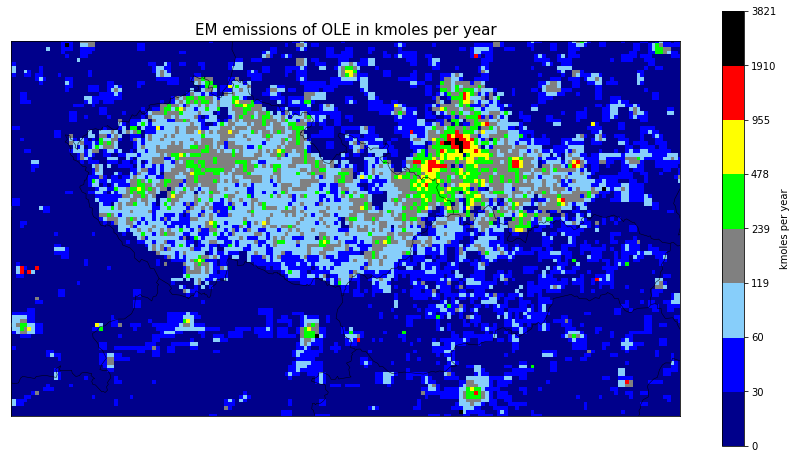

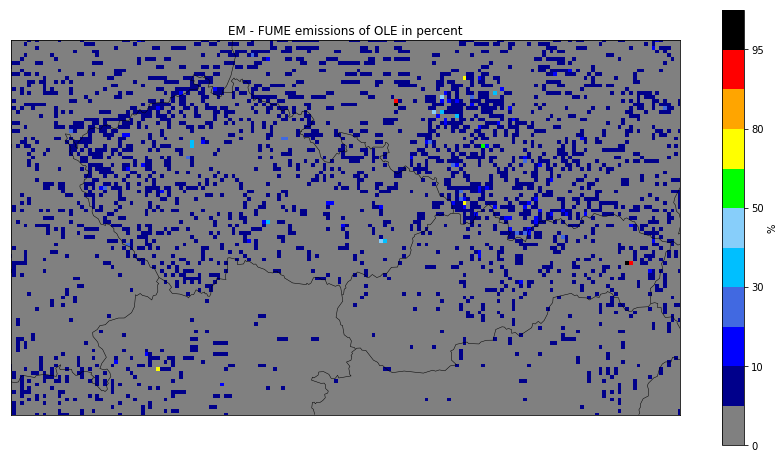

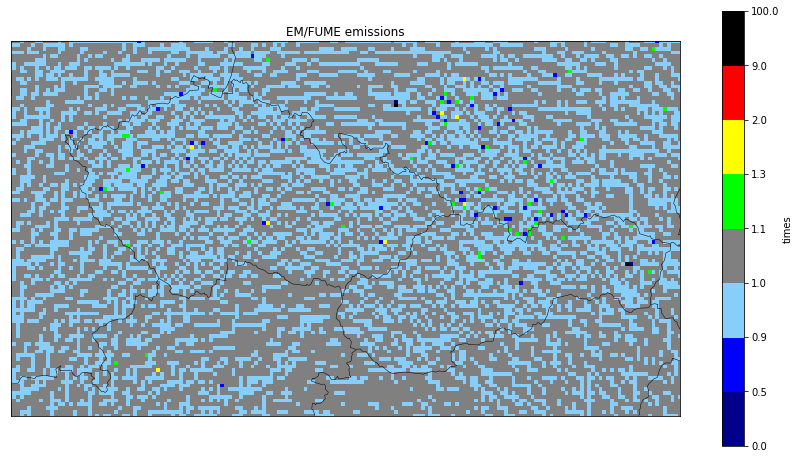

In [8]:
for i in dic_ann.keys():
    if np.sum(dic_species[i])>0 and i!='CH4': 
        units=emissions.variables[i].units
         
        vmaxx=np.max(dic_ann_H[i])    
        
        
        farby=['darkblue','blue','lightskyblue','grey','lime','yellow','red','black']
        levely=[0,vmaxx/(2**7),vmaxx/(2**6),vmaxx/(2**5),vmaxx/(2**4),vmaxx/(2**3),vmaxx/(2**2),vmaxx/2,vmaxx]
        cmap, norm = from_levels_and_colors(levely,farby )
       
        
        mapp.drawcountries()

        # choose one of the two style of the plot
        mapp.pcolormesh(lon,lat,dic_ann_H[i],cmap=cmap,latlon=True, norm=norm) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='{0} per year'.format(units))
        plt.title('FUME emissions of {0} in {1} per year'.format(i,units), size=15)
        #plt.savefig('/data/emisie_machine_learning/annual_maps/annual_emis_{0}_FUME'.format(i), dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

        ###############################################################################
       
        mapp.drawcountries()

        # choose one of the two style of the plot
        mapp.pcolormesh(lon,lat,dic_species[i],cmap=cmap,latlon=True, norm=norm) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='{0} per year'.format(units))
        plt.title('EM emissions of {0} in {1} per year'.format(i,units), size=15)
        #plt.savefig('/data/emisie_machine_learning/annual_maps/annual_emis_{0}_FUME'.format(i), dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
    
    

        ##############################################################################
        plt.rcParams['figure.figsize'] = 15,8
        farby=['grey','darkblue','blue','royalblue','deepskyblue','lightskyblue','lime','yellow','orange','red','black']
        levely=[0,2,10,20,30,40,50,60,80,90,95,1000000]
        cmap, norm = from_levels_and_colors(levely,farby )


        mapp.drawcountries()

        # choose one of the two style of the plot
        mapp.pcolormesh(lon,lat,np.abs(dic_species[i]-dic_ann_H[i])/dic_ann_H[i]*100,cmap=cmap,norm=norm,latlon=True) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='%')
        plt.title('EM - FUME emissions of {0} in percent'.format(i,units))
        #plt.savefig('/data/emisie_machine_learning/annual_maps/annual_emis_{0}_FUME'.format(i), dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()


        plt.rcParams['figure.figsize'] = 15,8
        farby=['darkblue','blue','lightskyblue','grey','lime','yellow','red','black']
        levely=[0,0.5,0.9,1,1.1,1.3,2,9,100]
        cmap, norm = from_levels_and_colors(levely,farby )


       
        mapp.drawcountries()

        # choose one of the two style of the plot
        mapp.pcolormesh(lon,lat,dic_species[i]/dic_ann_H[i],cmap=cmap,norm=norm,latlon=True) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='times')
        plt.title('EM/FUME emissions')
        #plt.savefig('/data/emisie_machine_learning/annual_maps/annual_emis_{0}_FUME'.format(i), dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

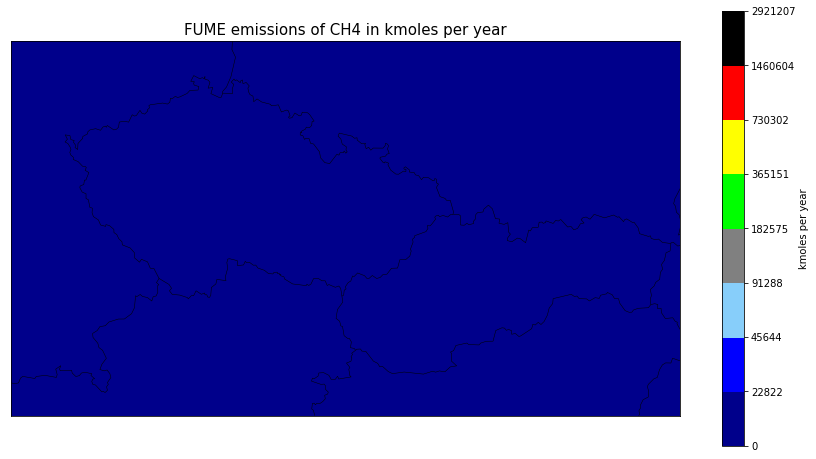

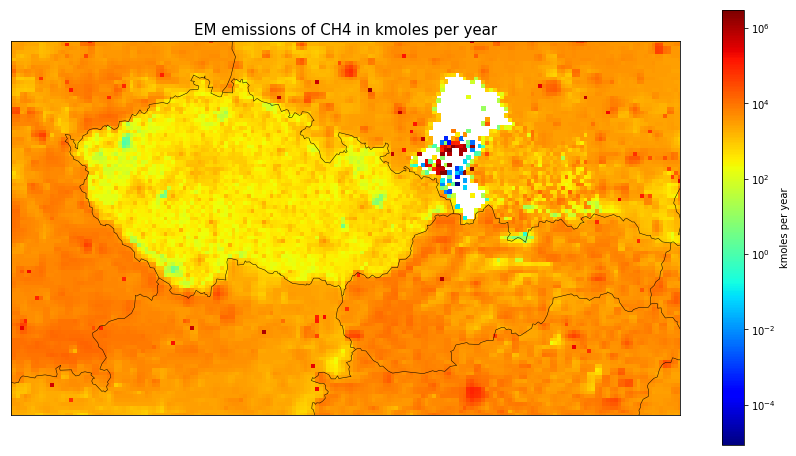

In [39]:
i='CH4'
vmaxx=np.max(dic_species[i])    


farby=['darkblue','blue','lightskyblue','grey','lime','yellow','red','black']
levely=[0,vmaxx/(2**7),vmaxx/(2**6),vmaxx/(2**5),vmaxx/(2**4),vmaxx/(2**3),vmaxx/(2**2),vmaxx/2,vmaxx]
cmap, norm = from_levels_and_colors(levely,farby )


mapp.drawcountries()

# choose one of the two style of the plot
mapp.pcolormesh(lon,lat,dic_ann[i],cmap=cmap,latlon=True, norm=norm) 
#mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

plt.colorbar(label='{0} per year'.format(units))
plt.title('FUME emissions of {0} in {1} per year'.format(i,units), size=15)
#plt.savefig('/data/emisie_machine_learning/annual_maps/annual_emis_{0}_FUME'.format(i), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

###############################################################################

mapp.drawcountries()

# choose one of the two style of the plot
mapp.pcolormesh(lon,lat,dic_species[i],cmap=plt.cm.jet,latlon=True, norm=colors.LogNorm()) 
#mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

plt.colorbar(label='{0} per year'.format(units))
plt.title('EM emissions of {0} in {1} per year'.format(i,units), size=15)
#plt.savefig('/data/emisie_machine_learning/annual_maps/annual_emis_{0}_FUME'.format(i), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

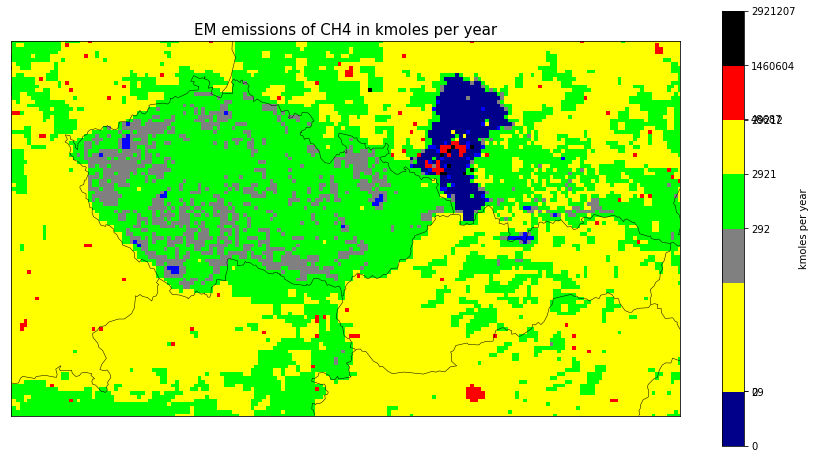

In [44]:
i='CH4'
vmaxx=np.max(dic_species[i])    


farby=['darkblue','blue','lightskyblue','grey','lime','yellow','red','black']
levely=[0,vmaxx/(10**7),vmaxx/(10*6),vmaxx/(10**5),vmaxx/(10**4),vmaxx/(10**3),vmaxx/(10**2),vmaxx/2,vmaxx]
cmap, norm = from_levels_and_colors(levely,farby )

mapp.drawcountries()

# choose one of the two style of the plot
mapp.pcolormesh(lon,lat,dic_species[i],cmap=cmap,latlon=True, norm=norm) 
#mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

plt.colorbar(label='{0} per year'.format(units))
plt.title('EM emissions of {0} in {1} per year'.format(i,units), size=15)
#plt.savefig('/data/emisie_machine_learning/annual_maps/annual_emis_{0}_FUME'.format(i), dpi=300, bbox_inches='tight')
plt.show()
plt.close()